# BIG MART SALES PREDICTION

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotnine import *
import matplotlib.pyplot as plt

#Read files:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
final_data=pd.DataFrame(test[['Item_Identifier','Outlet_Identifier']],columns=['Item_Identifier','Outlet_Identifier'])

In [3]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print (train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

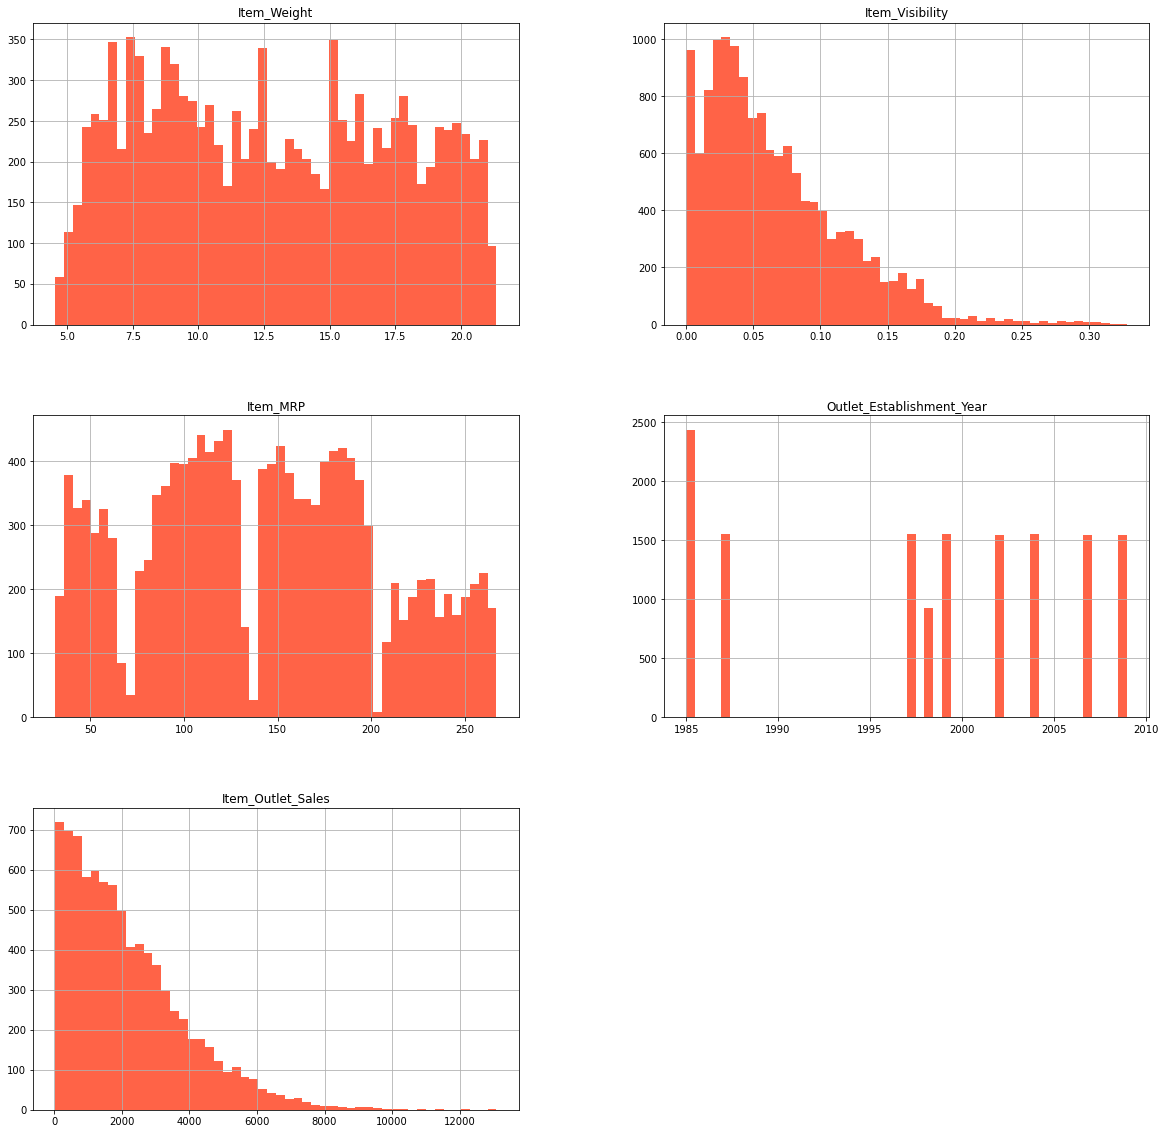

In [7]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,20), color='tomato')
plt.show()

# DATA VISUALISTION

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64


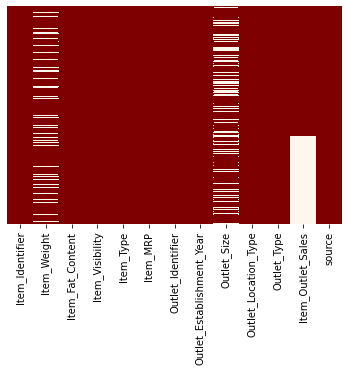

In [8]:
print (data.apply(lambda x: sum(x.isnull())))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='OrRd_r')
#data.apply(lambda x: sum(x.isnull()))

In [9]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


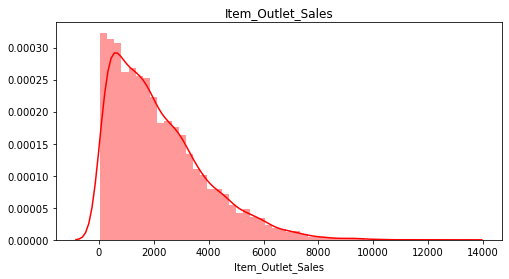

In [10]:
plt.figure(figsize=(8,4))
sns.distplot(data['Item_Outlet_Sales'],color='red')
plt.title("Item_Outlet_Sales")
plt.show()

we can see the Item_Outlet_Sales is right skewed with a long right tail we should have mean greater than the median which we can also see from summary

In [11]:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

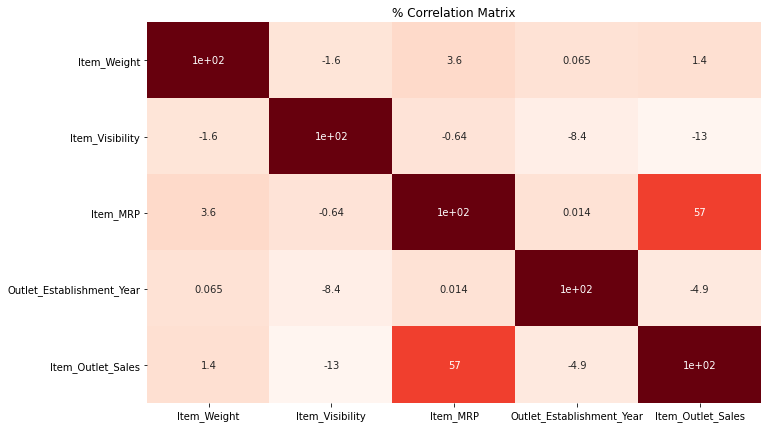

In [12]:
#corelation matrix
plt.figure(figsize=(11,7))
sns.heatmap(cbar=False,annot=True,data=data.corr()*100,cmap='Reds')
plt.title('% Correlation Matrix')
plt.show()

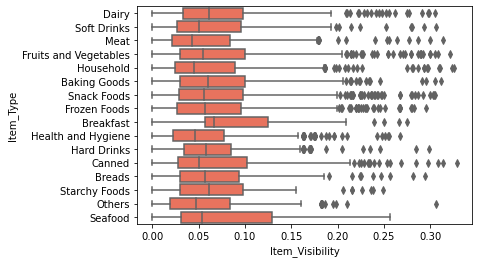

In [13]:
sns.boxplot(x='Item_Visibility', y='Item_Type', color='tomato',
    data=data)

There are so many Outliers for Item_Visibility variable which is evident from the fact that it is right skewed.

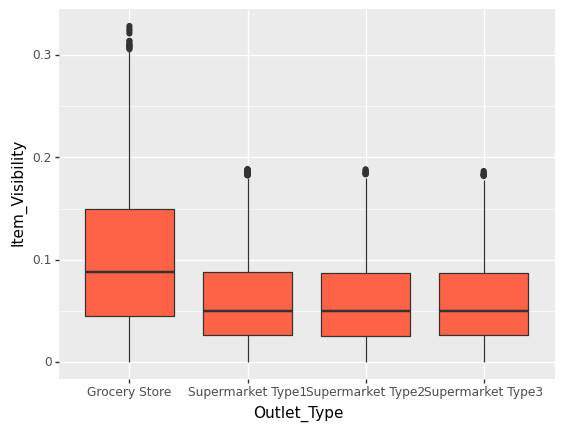

<ggplot: (-9223371924732673840)>

In [14]:
ggplot(data, aes('Outlet_Type','Item_Visibility')) + geom_boxplot(fill = "tomato") 

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text major ticklabel objects>)

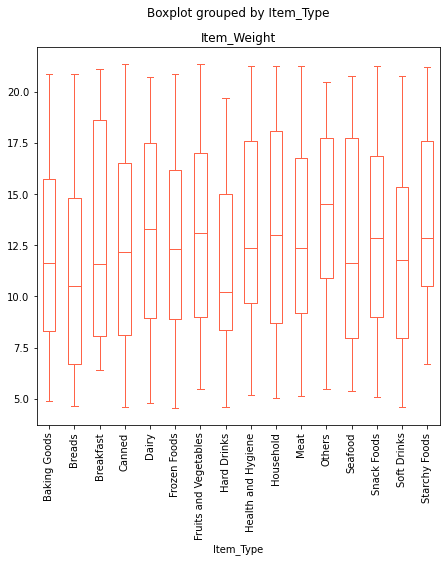

In [15]:
data.boxplot(column='Item_Weight',by='Item_Type',grid=False,
figsize=(7,7), color = "tomato")
plt.xticks(rotation=90)

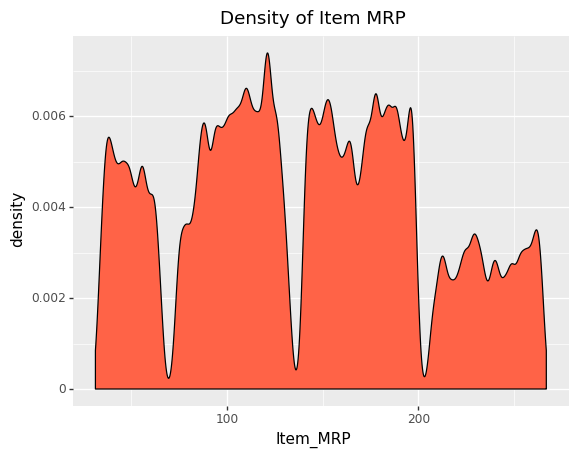

<ggplot: (-9223371924732584584)>

In [16]:
ggplot(data, aes('Item_MRP')) + geom_density(adjust = 1/5, fill = "tomato") + ggtitle('Density of Item MRP')

from our shear logic the Item_Outlet_Sales and Item_Visibility should be related(the item which has more sale will obviously be more visible) which is evident from the fact that both Item_Visibility and Item_Outlet_Sales are right skewed.

# Impact of features on Item_Outlet_Sales

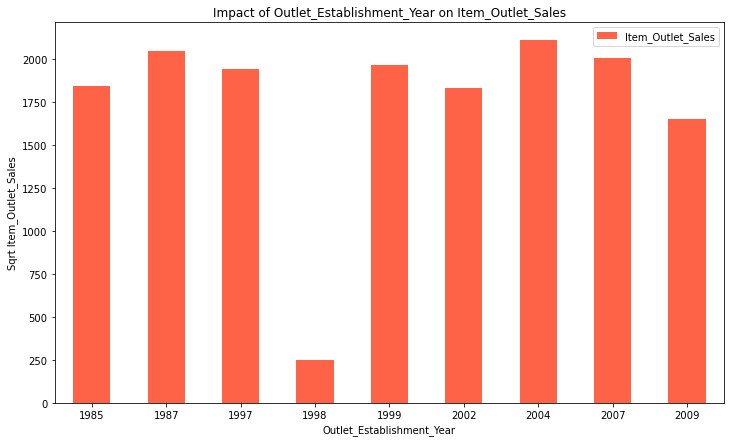

In [17]:
Outlet_Establishment_Year_pivot = \
train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='tomato',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

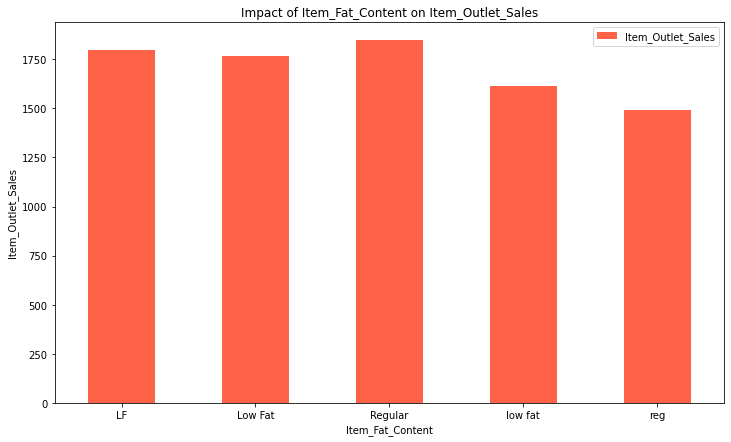

In [18]:
Item_Fat_Content_pivot = \
train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='tomato',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

C:\Users\ParthM\anaconda3\envs\project\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_boxplot : Removed 5681 rows containing non-finite values.


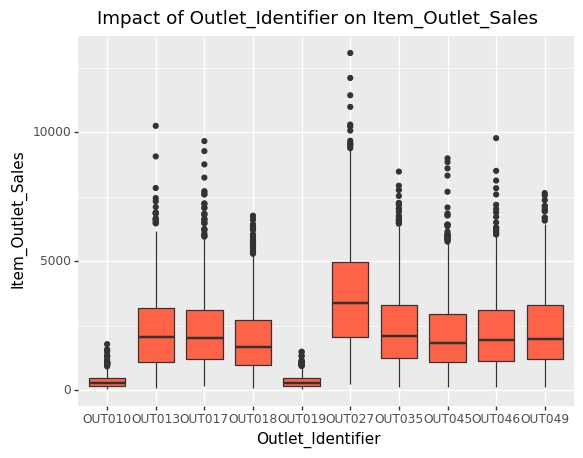

<ggplot: (-9223371924732212904)>

In [19]:
ggplot(data, aes('Outlet_Identifier','Item_Outlet_Sales')) + geom_boxplot(fill = "tomato") + ggtitle('Impact of Outlet_Identifier on Item_Outlet_Sales')

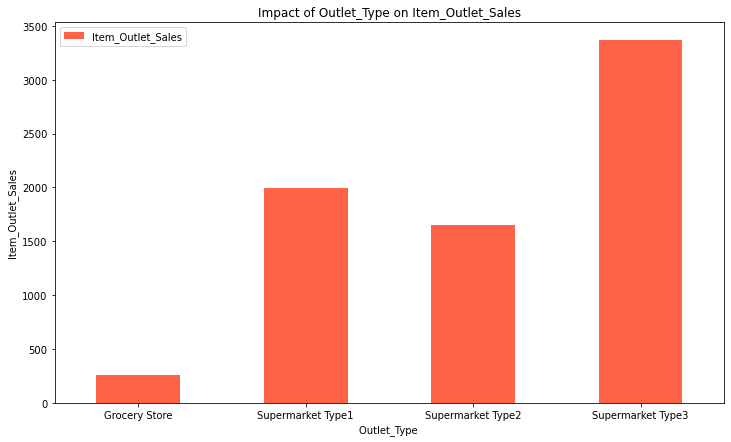

In [20]:
Outlet_Type_pivot = \
train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='tomato',figsize=(12,7))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

C:\Users\ParthM\anaconda3\envs\project\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 5681 rows containing missing values.


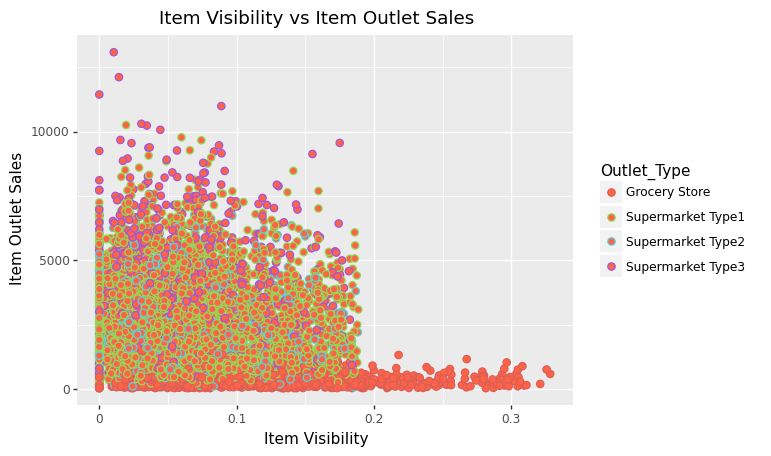

<ggplot: (-9223371924732866936)>

In [21]:
#ggplot(data,aes('Item_Outlet_Sales','Item_Visibility',col = 'Outlet_Type')) + geom_point()
ggplot(data, aes(x= 'Item_Visibility', y = 'Item_Outlet_Sales', color = 'Outlet_Type', )) + geom_point(size = 2.5,fill = "tomato") + xlab('Item Visibility') + ylab('Item Outlet Sales') + ggtitle('Item Visibility vs Item Outlet Sales')

C:\Users\ParthM\anaconda3\envs\project\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 5681 rows containing missing values.


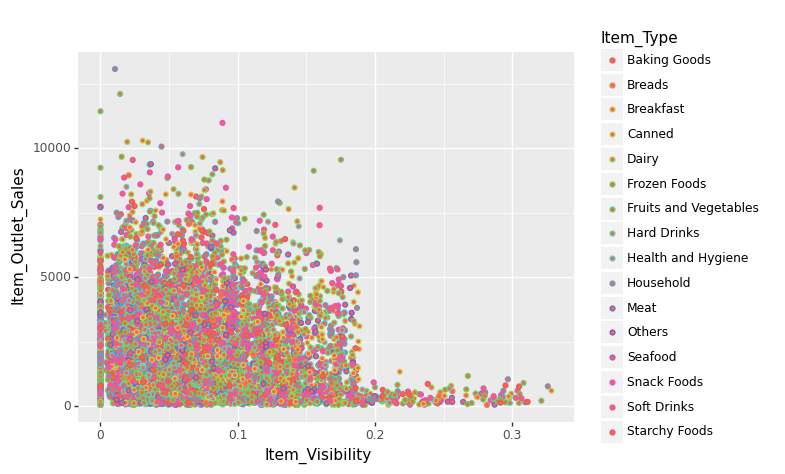

<ggplot: (-9223371924732814704)>

In [22]:
ggplot(data, aes( x='Item_Visibility',y='Item_Outlet_Sales', 
    color = 'Item_Type')) + geom_point(fill = "tomato")

# Data Preprocessing

In [23]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (data[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

F

In [24]:
#Determine the average weight per item:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Item_Weight'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Orignal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])
print ('Final #missing: %d'% sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Orignal #missing: 4016
0


[]

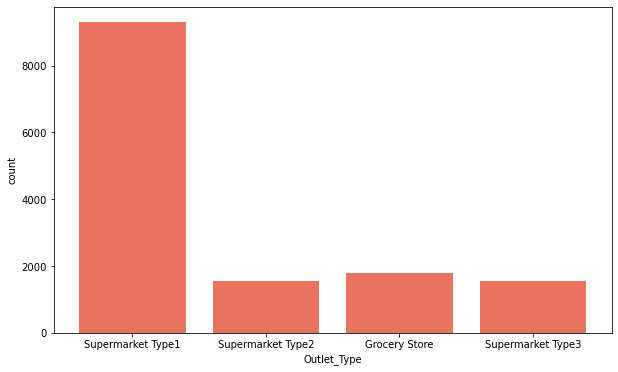

In [25]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
print ('Mode for each Outlet_Type:')
print (outlet_size_mode)

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Outlet_Size'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('\nOrignal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print (sum(data['Outlet_Size'].isnull()))
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='Outlet_Type',color='tomato')
plt.plot()

In [26]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
miss_bool = (data['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(miss_bool))
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


In [27]:
#Determine another variable with means ratio
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg.loc[x['Item_Identifier']], axis=1)
print (data['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


In [28]:
#tried#data['Item_Identifier'].apply(lambda x:x[0:2])
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','DR':'Drinks','NC':'Non-Consumable'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [29]:
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

[]

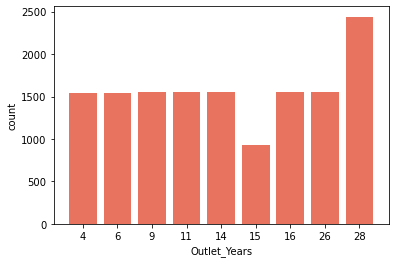

In [30]:
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
#data['Outlet_Years'].describe()

sns.countplot(data=data,x='Outlet_Years', color='tomato')
plt.plot()

In [31]:
#Change categories of low fat:
print ('Original Categories:')
print (data['Item_Fat_Content'].value_counts())

print ('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
print (data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [32]:
print (data['Item_Fat_Content'].value_counts())

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


Low Fat        6499
Regular        5019
Non-Edibles    2686
Name: Item_Fat_Content, dtype: int64


[]

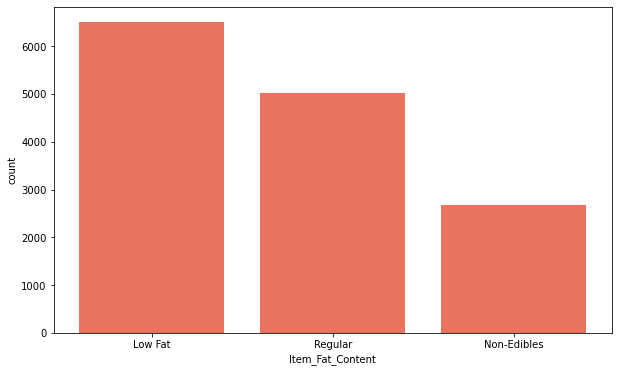

In [33]:
#Mark non-consumables as separate category in low_fat:

data.loc[data['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content']="Non-Edibles"

print (data['Item_Fat_Content'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='Item_Fat_Content',color='tomato')
plt.plot()

In [34]:
#Import library:
from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#New variable for outlet
#data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet_Identifier']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [35]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
source                        object
Item_Visibility_MeanRatio    float64
Item_Type_Combined             int32
Outlet_Years                   int64
dtype: object

In [36]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [37]:
#Drop the id columns
data['Item_Weight'] = data['Item_Weight'].astype("float64")
data.drop(['Item_Identifier'],axis=1, inplace =True)

In [38]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

C:\Users\ParthM\anaconda3\envs\project\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

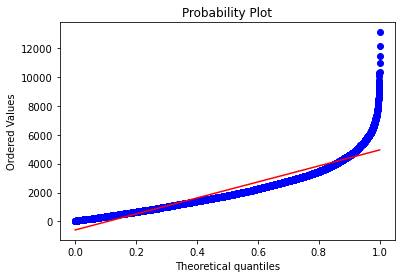

In [39]:
## lets draw some plots to see that the regression assumptions are not voilated
## QQ plot

import pylab 
import scipy.stats as stats

quantile = train['Item_Outlet_Sales']

stats.probplot(quantile, dist="uniform", plot=pylab)
pylab.show()

## the line is almost linear except for the end points 

# Building Models 

In [40]:
X= train.drop(['Item_Outlet_Sales'],axis = 1)
Y = train[['Item_Outlet_Sales']]

In [41]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(X)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_Valid, y_train, y_valid = train_test_split(x,Y, test_size = 0.3, random_state=0)

In [43]:
print (X_train.shape)
print (y_train.shape)
print (X_Valid.shape)
print (y_valid.shape)

(5966, 11)
(5966, 1)
(2557, 11)
(2557, 1)


# Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train, y_train)
sales_pred = lin_reg.predict(X_Valid)

In [45]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_valid, sales_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1201.1611519106073

In [46]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [47]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, X_train, y_train,
    scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1182.99123405 1229.82875566 1165.27936895 1158.14867873 1162.24752549
 1132.19005881 1144.31347296 1114.1466052  1243.71215947 1148.50595205]
Mean: 1168.1363811369274
Standard deviation: 38.78250640966064


# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
tree_reg.fit(X_train, y_train)
sales_pred = tree_reg.predict(X_Valid)

In [49]:
tree_mse = mean_squared_error(y_valid, sales_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1125.6409817385334

In [50]:
scores = cross_val_score(tree_reg, X_train, y_train,
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

Scores: [1079.79353179 1134.31790244 1111.98782888 1044.23632549 1097.10953114
 1100.00264445 1077.79095878 1050.99399272 1145.50684011 1079.57570113]
Mean: 1092.131525690678
Standard deviation: 31.002251374232394


In [51]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'max_depth': [6,8,12,15], 'min_samples_leaf': [50,100, 200]}]
tree_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg, param_grid, cv=5,
scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [6, 8, 12, 15],
                          'min_samples_leaf': [50, 100, 200]}],
             scoring='neg_mean_squared_error')

In [52]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 50}

In [53]:
grid_tree_reg = DecisionTreeRegressor(max_depth=6, min_samples_leaf=50)
grid_tree_reg.fit(X_train, y_train)
sales_pred = grid_tree_reg.predict(X_Valid)
tree_mse = mean_squared_error(y_valid, sales_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1116.538807842092

In [54]:
scores1 = cross_val_score(grid_tree_reg, X_train, y_train,
scoring="neg_mean_squared_error", cv=10)
rmse_scores1 = np.sqrt(-scores1)
display_scores(rmse_scores1)

Scores: [1058.91500421 1138.51073844 1109.88100258 1045.16657787 1076.11934508
 1076.41459131 1061.90557964 1062.22293678 1131.58138887 1051.70317141]
Mean: 1081.2420336192201
Standard deviation: 31.767271753357427


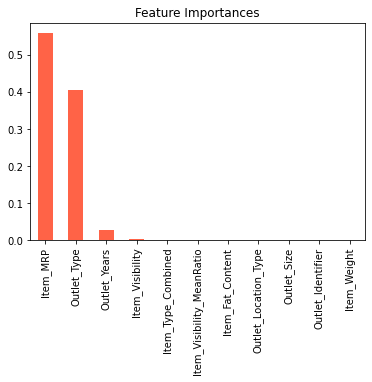

In [55]:
alg1 = pd.Series(grid_tree_reg.feature_importances_, X.columns).sort_values(ascending=False)
alg1.plot(kind='bar', title='Feature Importances',color='tomato')

# Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
forest_reg.fit(X_train, y_train.values.ravel())
sales_pred = forest_reg.predict(X_Valid)

In [57]:
forest_mse = mean_squared_error(y_valid, sales_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1119.3417625245693

In [58]:
scores = cross_val_score(forest_reg, X_train, y_train.values.ravel(),
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

Scores: [1085.07260703 1121.6822192  1094.03425368 1047.39830898 1081.92326067
 1066.36414567 1057.11566946 1055.19464246 1152.62312934 1052.69773634]
Mean: 1081.410597283546
Standard deviation: 32.17333949833048


# Grid Search

In [62]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'bootstrap': [False,True], 'n_estimators': [100, 200,300], 'max_depth': [3, 4,5,6], 'min_samples_leaf':[50,100]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False, True], 'max_depth': [3, 4, 5, 6],
                          'min_samples_leaf': [50, 100],
                          'n_estimators': [100, 200, 300]}],
             scoring='neg_mean_squared_error')

In [63]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1169.9299950639174 {'bootstrap': False, 'max_depth': 3, 'min_samples_leaf': 50, 'n_estimators': 100}
1169.9299950639174 {'bootstrap': False, 'max_depth': 3, 'min_samples_leaf': 50, 'n_estimators': 200}
1169.9299950639174 {'bootstrap': False, 'max_depth': 3, 'min_samples_leaf': 50, 'n_estimators': 300}
1169.9067322946278 {'bootstrap': False, 'max_depth': 3, 'min_samples_leaf': 100, 'n_estimators': 100}
1169.9067322946278 {'bootstrap': False, 'max_depth': 3, 'min_samples_leaf': 100, 'n_estimators': 200}
1169.9067322946278 {'bootstrap': False, 'max_depth': 3, 'min_samples_leaf': 100, 'n_estimators': 300}
1096.527335084842 {'bootstrap': False, 'max_depth': 4, 'min_samples_leaf': 50, 'n_estimators': 100}
1096.527335084842 {'bootstrap': False, 'max_depth': 4, 'min_samples_leaf': 50, 'n_estimators': 200}
1096.5273350848415 {'bootstrap': False, 'max_depth': 4, 'min_samples_leaf': 50, 'n_estimators': 300}
1095.0130743208376 {'bootstrap': False, 'max_depth': 4, 'min_samples_leaf': 100, 'n_estima

In [64]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'min_samples_leaf': 50,
 'n_estimators': 200}

In [66]:
forest_reg1 = RandomForestRegressor(bootstrap=True,n_estimators=200,max_depth=6, min_samples_leaf=50)
forest_reg1.fit(X_train, y_train.values.ravel())
sales_pred = forest_reg1.predict(X_Valid)
forest_mse = mean_squared_error(y_valid, sales_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1111.170303980067

In [67]:
scores1 = cross_val_score(forest_reg1, X_train, y_train.values.ravel(),
scoring="neg_mean_squared_error", cv=10)
rmse_scores1 = np.sqrt(-scores1)
display_scores(rmse_scores1)

Scores: [1061.2169966  1123.503815   1086.90683963 1030.93169717 1075.36343311
 1064.05331709 1047.04717957 1039.30537664 1132.48217571 1052.79788725]
Mean: 1071.3608717781058
Standard deviation: 32.35198517368086


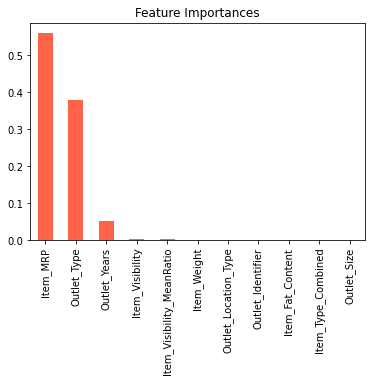

In [68]:
alg2 = pd.Series(forest_reg1.feature_importances_, X.columns).sort_values(ascending=False)
alg2.plot(kind='bar', title='Feature Importances',color='tomato')

# XGBoost 

In [140]:
import xgboost 
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=2)
my_model.fit(X_train, y_train,verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [141]:
from sklearn import metrics
#Predict training set:
#train_pred = my_model.predict(X_train)
# make predictions
pred = my_model.predict(X_Valid)
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(pred,y_valid)))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(pred,y_valid)))

Mean Absolute Error : 785.0026223174306
RMSE : 1107


In [142]:
scores = cross_val_score(my_model, X_train, y_train.values.ravel(),
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

Scores: [1081.2602991  1126.84746707 1098.48311271 1036.51958097 1069.89825142
 1052.5894282  1056.75509053 1067.42885081 1144.53609792 1047.00097924]
Mean: 1078.131915796765
Standard deviation: 33.46511036637615


In [138]:
from sklearn.model_selection import GridSearchCV

param_search = {
 'max_depth':range(2,3,6),
 'n_estimators':[300,500,1000],  
 'learning_rate':[0.001,0.01, 0.05,0.1]
}

myModel1 = GridSearchCV(estimator=XGBRegressor(),
                       param_grid = param_search,
                       cv = 5,n_jobs=-1
                      )
myModel1.fit(X_train, y_train)
#my_model1.fit(X_train, y_train, early_stopping_rounds=5, 
             #eval_set=[(X_Valid,y_valid)], verbose=False)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [139]:
print(myModel1.best_score_)
print(myModel1.best_params_)

0.5962870863135067
{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1000}


In [143]:
my_model1= XGBRegressor(n_estimators=1000, learning_rate=0.01,max_depth=2)
my_model1.fit(X_train, y_train)
#train_pred = my_model1.predict(X_train)
# make predictions
pred = my_model1.predict(X_Valid)
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(pred,y_valid)))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(pred,y_valid)))

Mean Absolute Error : 783.5621331862168
RMSE : 1105


In [144]:
scores1 = cross_val_score(my_model1, X_train, y_train.values.ravel(),
scoring="neg_mean_squared_error", cv=10)
rmse_scores1 = np.sqrt(-scores1)
display_scores(rmse_scores1)

Scores: [1070.27167406 1125.27033385 1097.64926557 1030.41260998 1066.59905808
 1049.75512162 1046.17646215 1047.99075763 1142.84915025 1042.54827436]
Mean: 1071.9522707538267
Standard deviation: 35.89205828567427


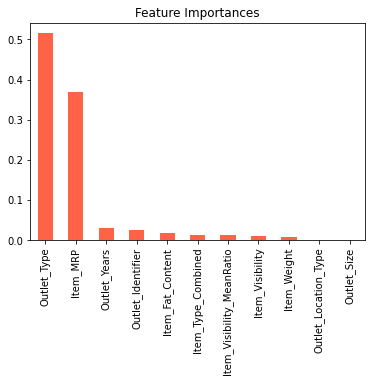

In [145]:
alg3 = pd.Series(my_model1.feature_importances_, X.columns).sort_values(ascending=False)
alg3.plot(kind='bar', title='Feature Importances',color='tomato')

# Deep Neural Network Model

In [146]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim = 11, kernel_initializer='normal', activation='relu'))
    model.add(Dense(100,kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    # compile the model
    #adam = Adam(lr = 0.01)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    return model

# create the model
model = KerasRegressor(build_fn = create_model, verbose = 1)

Using TensorFlow backend.


In [147]:
h = model.fit(X_train, y_train, epochs=70, batch_size=100, validation_data=(X_Valid,y_valid))

Train on 5966 samples, validate on 2557 samples
Epoch 1/70
5966/5966 [==============================] - 0s 48us/step - loss: 7516123.7958 - mae: 2160.2654 - val_loss: 7809774.8221 - val_mae: 2187.8384
Epoch 2/70
5966/5966 [==============================] - 0s 25us/step - loss: 7065257.0424 - mae: 2075.2593 - val_loss: 6829661.0913 - val_mae: 2005.8201
Epoch 3/70
5966/5966 [==============================] - 0s 27us/step - loss: 5443646.9806 - mae: 1748.0419 - val_loss: 4448550.4286 - val_mae: 1518.1978
Epoch 4/70
5966/5966 [==============================] - 0s 23us/step - loss: 3017089.7497 - mae: 1202.3322 - val_loss: 2182811.2623 - val_mae: 1019.0117
Epoch 5/70
5966/5966 [==============================] - 0s 28us/step - loss: 1675546.4887 - mae: 902.1682 - val_loss: 1556860.2406 - val_mae: 902.6285
Epoch 6/70
5966/5966 [==============================] - 0s 25us/step - loss: 1402700.8952 - mae: 846.3014 - val_loss: 1441146.3754 - val_mae: 875.1946
Epoch 7/70
5966/5966 [================

In [148]:
from sklearn import metrics
# Measure RMSE error.  RMSE is common for regression.
pred = model.predict(X_Valid[0:500])
score = np.sqrt(metrics.mean_squared_error(pred,y_valid[0:500]))
print(f"Final score (RMSE): {score}")

500/500 [==============================] - 0s 38us/step
Final score (RMSE): 1101.1215370484845


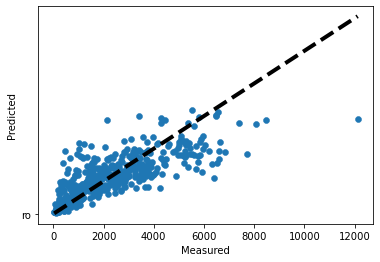

In [149]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.style.use('ggplot')
ax.scatter(y_valid[0:500], pred)
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--','ro', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [150]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.values.ravel()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

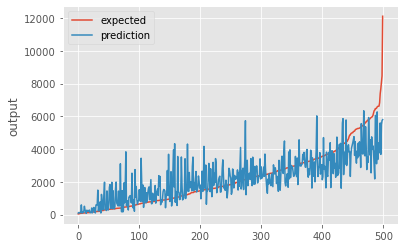

In [151]:
# Plot the chart
chart_regression(pred,y_valid[0:500])

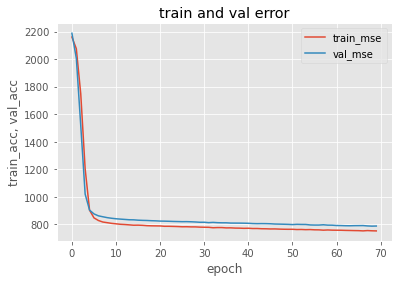

In [152]:
import keras
from matplotlib import pyplot as plt
#history = model.fit(trainData,trainLabel, validation_data=(validData, validLabel), epochs=100, batch_size=4)
plt.plot(h.history['mae'])
plt.plot(h.history['val_mae'])
plt.title('train and val error')
plt.ylabel('train_acc, val_acc')
plt.xlabel('epoch')
plt.legend(['train_mse', 'val_mse'], loc='upper right')
plt.show()

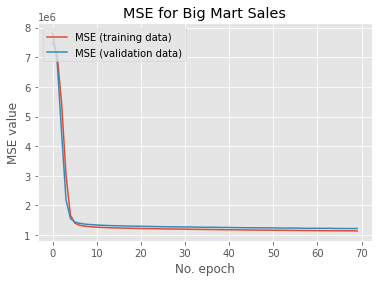

In [153]:
# Plot history: MAE
plt.plot(h.history['loss'], label='MSE (training data)')
plt.plot(h.history['val_loss'], label='MSE (validation data)')
plt.title('MSE for Big Mart Sales')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [170]:
# Do a grid search for the optimal batch size and number of epochs
# import necessary packages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim = 11, kernel_initializer='normal', activation='relu'))
    model.add(Dense(100,kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    # compile the model
    #adam = Adam(lr = 0.01)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, verbose = 1)

# define the grid search parameters
batch_size = [20, 40, 60, 80, 100,150,200]
epochs = [20, 50, 100, 150]
#batch_size = [50, 70, 100]
#epochs = [100, 500, 1000]

# make a dictionary of the grid search parameters
param_grid = dict(batch_size=batch_size, epochs=epochs)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X_train, y_train)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

C:\Users\ParthM\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] batch_size=20, epochs=20 ........................................
Epoch 1/20
4772/4772 [==============================] - 1s 114us/step - loss: 1315088.9644 - accuracy: 4.1911e-04
Epoch 2/20
4772/4772 [==============================] - 0s 76us/step - loss: 209263.5833 - accuracy: 0.0021
Epoch 3/20
4772/4772 [==============================] - 0s 70us/step - loss: 191063.9166 - accuracy: 0.0010
Epoch 4/20
4772/4772 [==============================] - 0s 69us/step - loss: 185318.0771 - accuracy: 0.0010
Epoch 5/20
4772/4772 [==============================] - 0s 70us/step - loss: 182183.7276 - accuracy: 0.0010
Epoch 6/20
4772/4772 [==============================] - 0s 74us/step - loss: 179616.2777 - accuracy: 0.0013
Epoch 7/20
4772/4772 [==============================] - 0s 79us/step - loss: 178291.5823 - accuracy: 0.0010
Epoch 8/20
4772/4772 [==============================] - 0s 74us/step - loss: 177180.5791 - accuracy: 8.38

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s remaining:    0.0s


Epoch 1/20
4773/4773 [==============================] - 0s 87us/step - loss: 1261983.0006 - accuracy: 8.3805e-04
Epoch 2/20
4773/4773 [==============================] - 0s 69us/step - loss: 209842.2663 - accuracy: 0.0017
Epoch 3/20
4773/4773 [==============================] - 0s 69us/step - loss: 192875.7818 - accuracy: 0.0000e+00
Epoch 4/20
4773/4773 [==============================] - 0s 70us/step - loss: 187440.4638 - accuracy: 4.1902e-04
Epoch 5/20
4773/4773 [==============================] - 0s 69us/step - loss: 183641.2563 - accuracy: 0.0010
Epoch 6/20
4773/4773 [==============================] - 0s 69us/step - loss: 181290.0573 - accuracy: 6.2854e-04
Epoch 7/20
4773/4773 [==============================] - 0s 70us/step - loss: 179500.3649 - accuracy: 0.0010
Epoch 8/20
4773/4773 [==============================] - 0s 69us/step - loss: 178325.8441 - accuracy: 8.3805e-04
Epoch 9/20
4773/4773 [==============================] - 0s 69us/step - loss: 177103.0927 - accuracy: 8.3805e-04
Epo

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.7s remaining:    0.0s


Epoch 1/20
4773/4773 [==============================] - 0s 87us/step - loss: 1315667.5291 - accuracy: 6.2854e-04
Epoch 2/20
4773/4773 [==============================] - 0s 67us/step - loss: 212179.4588 - accuracy: 8.3805e-04
Epoch 3/20
4773/4773 [==============================] - 0s 65us/step - loss: 193632.2966 - accuracy: 0.0015
Epoch 4/20
4773/4773 [==============================] - 0s 65us/step - loss: 187118.9542 - accuracy: 0.0013
Epoch 5/20
4773/4773 [==============================] - 0s 67us/step - loss: 183504.4940 - accuracy: 4.1902e-04
Epoch 6/20
4773/4773 [==============================] - 0s 67us/step - loss: 181220.5860 - accuracy: 6.2854e-04
Epoch 7/20
4773/4773 [==============================] - 0s 67us/step - loss: 179288.7149 - accuracy: 0.0015
Epoch 8/20
4773/4773 [==============================] - 0s 67us/step - loss: 177902.4102 - accuracy: 0.0010
Epoch 9/20
4773/4773 [==============================] - 0s 67us/step - loss: 176941.1736 - accuracy: 8.3805e-04
Epoch 1

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.9s remaining:    0.0s


Epoch 1/20
4773/4773 [==============================] - 0s 87us/step - loss: 1270117.4842 - accuracy: 0.0010
Epoch 2/20
4773/4773 [==============================] - 0s 67us/step - loss: 213683.1454 - accuracy: 8.3805e-04
Epoch 3/20
4773/4773 [==============================] - 0s 69us/step - loss: 195782.2672 - accuracy: 8.3805e-04
Epoch 4/20
4773/4773 [==============================] - 0s 67us/step - loss: 189831.9069 - accuracy: 0.0013
Epoch 5/20
4773/4773 [==============================] - 0s 67us/step - loss: 186484.1712 - accuracy: 0.0017
Epoch 6/20
4773/4773 [==============================] - 0s 69us/step - loss: 183988.3816 - accuracy: 0.0019
Epoch 7/20
4773/4773 [==============================] - 0s 67us/step - loss: 182947.5267 - accuracy: 6.2854e-04
Epoch 8/20
4773/4773 [==============================] - 0s 67us/step - loss: 181451.2439 - accuracy: 0.0013
Epoch 9/20
4773/4773 [==============================] - 0s 67us/step - loss: 180405.8376 - accuracy: 0.0015
Epoch 10/20
477

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   30.3s remaining:    0.0s


Epoch 1/20
4773/4773 [==============================] - 0s 87us/step - loss: 1257302.8272 - accuracy: 2.0951e-04
Epoch 2/20
4773/4773 [==============================] - 0s 65us/step - loss: 208304.3475 - accuracy: 0.0010
Epoch 3/20
4773/4773 [==============================] - 0s 67us/step - loss: 193153.9648 - accuracy: 6.2854e-04
Epoch 4/20
4773/4773 [==============================] - 0s 65us/step - loss: 187976.3999 - accuracy: 0.0013
Epoch 5/20
4773/4773 [==============================] - 0s 65us/step - loss: 184449.4130 - accuracy: 8.3805e-04
Epoch 6/20
4773/4773 [==============================] - 0s 67us/step - loss: 182391.5597 - accuracy: 0.0023
Epoch 7/20
4773/4773 [==============================] - 0s 65us/step - loss: 181066.4035 - accuracy: 0.0021
Epoch 8/20
4773/4773 [==============================] - 0s 67us/step - loss: 179583.9630 - accuracy: 0.0017
Epoch 9/20
4773/4773 [==============================] - 0s 67us/step - loss: 178580.4641 - accuracy: 0.0013
Epoch 10/20
477

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   37.4s remaining:    0.0s


Epoch 1/50
4772/4772 [==============================] - 0s 85us/step - loss: 1271927.4784 - accuracy: 0.0000e+00
Epoch 2/50
4772/4772 [==============================] - 0s 67us/step - loss: 208990.0274 - accuracy: 0.0010
Epoch 3/50
4772/4772 [==============================] - 0s 67us/step - loss: 191123.5508 - accuracy: 2.0956e-04
Epoch 4/50
4772/4772 [==============================] - 0s 67us/step - loss: 185566.4805 - accuracy: 0.0010
Epoch 5/50
4772/4772 [==============================] - 0s 67us/step - loss: 182071.2594 - accuracy: 0.0010
Epoch 6/50
4772/4772 [==============================] - 0s 67us/step - loss: 179715.8976 - accuracy: 0.0023
Epoch 7/50
4772/4772 [==============================] - 0s 67us/step - loss: 178182.6859 - accuracy: 0.0010
Epoch 8/50
4772/4772 [==============================] - 0s 67us/step - loss: 176518.0271 - accuracy: 6.2867e-04
Epoch 9/50
4772/4772 [==============================] - 0s 67us/step - loss: 176038.1177 - accuracy: 0.0013
Epoch 10/50
477

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   54.4s remaining:    0.0s


Epoch 1/50
4773/4773 [==============================] - 0s 84us/step - loss: 1297582.2613 - accuracy: 4.1902e-04
Epoch 2/50
4773/4773 [==============================] - 0s 65us/step - loss: 210573.1101 - accuracy: 2.0951e-04
Epoch 3/50
4773/4773 [==============================] - 0s 67us/step - loss: 192557.1012 - accuracy: 0.0013
Epoch 4/50
4773/4773 [==============================] - 0s 67us/step - loss: 186723.9717 - accuracy: 0.0010
Epoch 5/50
4773/4773 [==============================] - 0s 67us/step - loss: 183465.0161 - accuracy: 0.0015
Epoch 6/50
4773/4773 [==============================] - 0s 65us/step - loss: 181179.8038 - accuracy: 0.0015
Epoch 7/50
4773/4773 [==============================] - 0s 67us/step - loss: 179340.3360 - accuracy: 0.0015
Epoch 8/50
4773/4773 [==============================] - 0s 67us/step - loss: 178350.5647 - accuracy: 0.0015
Epoch 9/50
4773/4773 [==============================] - 0s 65us/step - loss: 177030.4750 - accuracy: 6.2854e-04
Epoch 10/50
477

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.2min remaining:    0.0s


Epoch 1/50
4773/4773 [==============================] - 0s 84us/step - loss: 1339746.6606 - accuracy: 6.2854e-04
Epoch 2/50
4773/4773 [==============================] - 0s 65us/step - loss: 217414.0390 - accuracy: 0.0010
Epoch 3/50
4773/4773 [==============================] - 0s 65us/step - loss: 194337.0735 - accuracy: 0.0017
Epoch 4/50
4773/4773 [==============================] - 0s 65us/step - loss: 187786.3380 - accuracy: 0.0013
Epoch 5/50
4773/4773 [==============================] - 0s 65us/step - loss: 184110.2625 - accuracy: 0.0017
Epoch 6/50
4773/4773 [==============================] - 0s 65us/step - loss: 181509.8785 - accuracy: 0.0023
Epoch 7/50
4773/4773 [==============================] - 0s 67us/step - loss: 179751.4776 - accuracy: 0.0010
Epoch 8/50
4773/4773 [==============================] - 0s 65us/step - loss: 178199.3117 - accuracy: 6.2854e-04
Epoch 9/50
4773/4773 [==============================] - 0s 64us/step - loss: 176897.3937 - accuracy: 4.1902e-04
Epoch 10/50
477

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.5min remaining:    0.0s


Epoch 1/50
4773/4773 [==============================] - 0s 85us/step - loss: 1294281.8225 - accuracy: 0.0010
Epoch 2/50
4773/4773 [==============================] - 0s 65us/step - loss: 214999.1445 - accuracy: 8.3805e-04
Epoch 3/50
4773/4773 [==============================] - 0s 65us/step - loss: 195659.5616 - accuracy: 0.0017
Epoch 4/50
4773/4773 [==============================] - 0s 70us/step - loss: 189898.1388 - accuracy: 0.0015
Epoch 5/50
4773/4773 [==============================] - 0s 65us/step - loss: 186500.7595 - accuracy: 8.3805e-04
Epoch 6/50
4773/4773 [==============================] - 0s 65us/step - loss: 184590.3779 - accuracy: 8.3805e-04
Epoch 7/50
4773/4773 [==============================] - 0s 69us/step - loss: 183087.1094 - accuracy: 0.0013
Epoch 8/50
4773/4773 [==============================] - 0s 67us/step - loss: 181137.3210 - accuracy: 4.1902e-04
Epoch 9/50
4773/4773 [==============================] - 0s 65us/step - loss: 180223.4895 - accuracy: 6.2854e-04
Epoch 1

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.7min remaining:    0.0s


Epoch 1/50
4773/4773 [==============================] - 0s 87us/step - loss: 1323100.8260 - accuracy: 2.0951e-04
Epoch 2/50
4773/4773 [==============================] - 0s 67us/step - loss: 213306.7040 - accuracy: 8.3805e-04
Epoch 3/50
4773/4773 [==============================] - 0s 67us/step - loss: 194509.7475 - accuracy: 6.2854e-04
Epoch 4/50
4773/4773 [==============================] - 0s 67us/step - loss: 188996.0919 - accuracy: 0.0015
Epoch 5/50
4773/4773 [==============================] - 0s 67us/step - loss: 185733.4154 - accuracy: 6.2854e-04
Epoch 6/50
4773/4773 [==============================] - 0s 67us/step - loss: 183087.5111 - accuracy: 0.0015
Epoch 7/50
4773/4773 [==============================] - 0s 67us/step - loss: 181425.0324 - accuracy: 0.0015
Epoch 8/50
4773/4773 [==============================] - 0s 67us/step - loss: 179765.9748 - accuracy: 6.2854e-04
Epoch 9/50
4773/4773 [==============================] - 0s 67us/step - loss: 179615.0439 - accuracy: 0.0010
Epoch 1

4772/4772 [==============================] - 0s 69us/step - loss: 156056.7148 - accuracy: 0.0015
Epoch 98/100
4772/4772 [==============================] - 0s 69us/step - loss: 156076.0758 - accuracy: 0.0013
Epoch 99/100
4772/4772 [==============================] - 0s 69us/step - loss: 155659.2084 - accuracy: 0.0015
Epoch 100/100
1194/1194 [==============================] - 0s 47us/step
[CV] ........... batch_size=20, epochs=100, score=0.004, total=  34.0s
[CV] batch_size=20, epochs=100 .......................................
Epoch 1/100
4773/4773 [==============================] - 0s 85us/step - loss: 1335908.7463 - accuracy: 6.2854e-04
Epoch 2/100
4773/4773 [==============================] - 0s 67us/step - loss: 215190.2248 - accuracy: 6.2854e-04
Epoch 3/100
4773/4773 [==============================] - 0s 65us/step - loss: 193505.1008 - accuracy: 6.2854e-04
Epoch 4/100
4773/4773 [==============================] - 0s 65us/step - loss: 188010.9571 - accuracy: 0.0010
Epoch 5/100
4773/477

4773/4773 [==============================] - 0s 69us/step - loss: 159696.0164 - accuracy: 0.0015
Epoch 70/100
4773/4773 [==============================] - 0s 65us/step - loss: 159960.0302 - accuracy: 8.3805e-04
Epoch 71/100
4773/4773 [==============================] - 0s 67us/step - loss: 159607.3953 - accuracy: 0.0013
Epoch 72/100
4773/4773 [==============================] - 0s 69us/step - loss: 159472.9619 - accuracy: 8.3805e-04
Epoch 73/100
4773/4773 [==============================] - 0s 67us/step - loss: 159092.8768 - accuracy: 0.0010
Epoch 74/100
4773/4773 [==============================] - 0s 65us/step - loss: 159889.3731 - accuracy: 0.0015
Epoch 75/100
4773/4773 [==============================] - 0s 69us/step - loss: 159649.4466 - accuracy: 4.1902e-04
Epoch 76/100
4773/4773 [==============================] - 0s 67us/step - loss: 159924.2546 - accuracy: 6.2854e-04
Epoch 77/100
4773/4773 [==============================] - 0s 67us/step - loss: 159510.9788 - accuracy: 8.3805e-04
Epo

4773/4773 [==============================] - 0s 67us/step - loss: 159919.1260 - accuracy: 0.0017
Epoch 42/100
4773/4773 [==============================] - 0s 67us/step - loss: 160360.7801 - accuracy: 0.0015
Epoch 43/100
4773/4773 [==============================] - 0s 65us/step - loss: 160333.8650 - accuracy: 0.0015
Epoch 44/100
4773/4773 [==============================] - 0s 67us/step - loss: 160250.1975 - accuracy: 0.0017
Epoch 45/100
4773/4773 [==============================] - 0s 67us/step - loss: 159875.7128 - accuracy: 0.0013
Epoch 46/100
4773/4773 [==============================] - 0s 67us/step - loss: 160043.9467 - accuracy: 0.0017
Epoch 47/100
4773/4773 [==============================] - 0s 67us/step - loss: 160173.9390 - accuracy: 0.0017
Epoch 48/100
4773/4773 [==============================] - 0s 65us/step - loss: 159529.4691 - accuracy: 0.0017
Epoch 49/100
4773/4773 [==============================] - 0s 67us/step - loss: 159573.8810 - accuracy: 8.3805e-04
Epoch 50/100
4773/4

4773/4773 [==============================] - 0s 67us/step - loss: 160372.3060 - accuracy: 0.0010
Epoch 87/100
4773/4773 [==============================] - 0s 67us/step - loss: 160492.3095 - accuracy: 0.0010
Epoch 88/100
4773/4773 [==============================] - 0s 67us/step - loss: 160550.9214 - accuracy: 0.0017
Epoch 89/100
4773/4773 [==============================] - 0s 67us/step - loss: 160357.6756 - accuracy: 0.0010
Epoch 90/100
4773/4773 [==============================] - 0s 67us/step - loss: 160266.2063 - accuracy: 8.3805e-04
Epoch 91/100
4773/4773 [==============================] - 0s 67us/step - loss: 160297.6441 - accuracy: 8.3805e-04
Epoch 92/100
4773/4773 [==============================] - 0s 67us/step - loss: 160053.0805 - accuracy: 0.0010
Epoch 93/100
4773/4773 [==============================] - 0s 69us/step - loss: 160202.5710 - accuracy: 0.0000e+00
Epoch 94/100
4773/4773 [==============================] - 0s 67us/step - loss: 159921.9908 - accuracy: 8.3805e-04
Epoch 9

4773/4773 [==============================] - 0s 69us/step - loss: 158971.9184 - accuracy: 0.0019
Epoch 59/100
4773/4773 [==============================] - 0s 67us/step - loss: 158856.8571 - accuracy: 0.0010
Epoch 60/100
4773/4773 [==============================] - 0s 69us/step - loss: 159091.8993 - accuracy: 0.0013
Epoch 61/100
4773/4773 [==============================] - 0s 67us/step - loss: 158740.9065 - accuracy: 2.0951e-04
Epoch 62/100
4773/4773 [==============================] - 0s 67us/step - loss: 158527.1260 - accuracy: 0.0017
Epoch 63/100
4773/4773 [==============================] - 0s 67us/step - loss: 158599.7564 - accuracy: 0.0015
Epoch 64/100
4773/4773 [==============================] - 0s 67us/step - loss: 158653.1669 - accuracy: 0.0013
Epoch 65/100
4773/4773 [==============================] - 0s 67us/step - loss: 158616.5632 - accuracy: 8.3805e-04
Epoch 66/100
4773/4773 [==============================] - 0s 67us/step - loss: 158800.9149 - accuracy: 0.0015
Epoch 67/100
47

4772/4772 [==============================] - 0s 69us/step - loss: 164906.1232 - accuracy: 0.0010
Epoch 31/150
4772/4772 [==============================] - 0s 70us/step - loss: 165137.6951 - accuracy: 0.0017
Epoch 32/150
4772/4772 [==============================] - 0s 67us/step - loss: 164181.1733 - accuracy: 0.0013
Epoch 33/150
4772/4772 [==============================] - 0s 67us/step - loss: 164054.2945 - accuracy: 8.3822e-04
Epoch 34/150
4772/4772 [==============================] - 0s 67us/step - loss: 163449.7254 - accuracy: 8.3822e-04
Epoch 35/150
4772/4772 [==============================] - 0s 67us/step - loss: 163066.5923 - accuracy: 6.2867e-04
Epoch 36/150
4772/4772 [==============================] - 0s 69us/step - loss: 162856.3480 - accuracy: 0.0013
Epoch 37/150
4772/4772 [==============================] - 0s 67us/step - loss: 162392.4093 - accuracy: 0.0019
Epoch 38/150
4772/4772 [==============================] - 0s 69us/step - loss: 161938.7251 - accuracy: 0.0013
Epoch 39/15

4773/4773 [==============================] - 0s 67us/step - loss: 167750.5359 - accuracy: 0.0013
Epoch 25/150
4773/4773 [==============================] - 0s 67us/step - loss: 167899.4797 - accuracy: 0.0015
Epoch 26/150
4773/4773 [==============================] - 0s 67us/step - loss: 166048.7228 - accuracy: 8.3805e-04
Epoch 27/150
4773/4773 [==============================] - 0s 65us/step - loss: 166061.1686 - accuracy: 0.0017
Epoch 28/150
4773/4773 [==============================] - 0s 67us/step - loss: 165294.6603 - accuracy: 8.3805e-04
Epoch 29/150
4773/4773 [==============================] - 0s 67us/step - loss: 165000.3508 - accuracy: 0.0017
Epoch 30/150
4773/4773 [==============================] - 0s 67us/step - loss: 165231.5868 - accuracy: 0.0013
Epoch 31/150
4773/4773 [==============================] - 0s 67us/step - loss: 163968.1879 - accuracy: 0.0015
Epoch 32/150
4773/4773 [==============================] - 0s 67us/step - loss: 163575.1351 - accuracy: 0.0015
Epoch 33/150
47

4773/4773 [==============================] - 0s 67us/step - loss: 168892.8269 - accuracy: 4.1902e-04
Epoch 19/150
4773/4773 [==============================] - 0s 67us/step - loss: 168655.3302 - accuracy: 0.0021
Epoch 20/150
4773/4773 [==============================] - 0s 67us/step - loss: 167732.1473 - accuracy: 0.0015
Epoch 21/150
4773/4773 [==============================] - 0s 67us/step - loss: 166500.1058 - accuracy: 0.0013
Epoch 22/150
4773/4773 [==============================] - 0s 67us/step - loss: 166136.2562 - accuracy: 0.0021
Epoch 23/150
4773/4773 [==============================] - 0s 67us/step - loss: 166405.3840 - accuracy: 0.0010
Epoch 24/150
4773/4773 [==============================] - 0s 67us/step - loss: 164757.1148 - accuracy: 0.0017
Epoch 25/150
4773/4773 [==============================] - 0s 67us/step - loss: 164641.4007 - accuracy: 0.0025
Epoch 26/150
4773/4773 [==============================] - 0s 67us/step - loss: 163771.9591 - accuracy: 0.0015
Epoch 27/150
4773/4

4773/4773 [==============================] - 0s 67us/step - loss: 178433.5676 - accuracy: 0.0013
Epoch 13/150
4773/4773 [==============================] - 0s 67us/step - loss: 177339.2776 - accuracy: 8.3805e-04
Epoch 14/150
4773/4773 [==============================] - 0s 67us/step - loss: 176678.6982 - accuracy: 6.2854e-04
Epoch 15/150
4773/4773 [==============================] - 0s 67us/step - loss: 175880.8786 - accuracy: 0.0015
Epoch 16/150
4773/4773 [==============================] - 0s 67us/step - loss: 175458.7106 - accuracy: 4.1902e-04
Epoch 17/150
4773/4773 [==============================] - 0s 67us/step - loss: 174599.1505 - accuracy: 6.2854e-04
Epoch 18/150
4773/4773 [==============================] - 0s 67us/step - loss: 174200.9500 - accuracy: 4.1902e-04
Epoch 19/150
4773/4773 [==============================] - 0s 69us/step - loss: 173690.2957 - accuracy: 0.0010
Epoch 20/150
4773/4773 [==============================] - 0s 67us/step - loss: 172535.3277 - accuracy: 0.0015
Epo

4773/4773 [==============================] - 0s 69us/step - loss: 182930.5259 - accuracy: 8.3805e-04
Epoch 7/150
4773/4773 [==============================] - 0s 67us/step - loss: 181316.9039 - accuracy: 0.0013
Epoch 8/150
4773/4773 [==============================] - 0s 65us/step - loss: 179536.0627 - accuracy: 8.3805e-04
Epoch 9/150
4773/4773 [==============================] - 0s 67us/step - loss: 178930.7179 - accuracy: 0.0013
Epoch 10/150
4773/4773 [==============================] - 0s 67us/step - loss: 178043.5134 - accuracy: 0.0013
Epoch 11/150
4773/4773 [==============================] - 0s 67us/step - loss: 176653.5484 - accuracy: 0.0019
Epoch 12/150
4773/4773 [==============================] - 0s 69us/step - loss: 175811.2103 - accuracy: 8.3805e-04
Epoch 13/150
4773/4773 [==============================] - 0s 67us/step - loss: 175106.1726 - accuracy: 0.0010
Epoch 14/150
4773/4773 [==============================] - 0s 67us/step - loss: 174839.2254 - accuracy: 8.3805e-04
Epoch 15/1

Epoch 1/20
4772/4772 [==============================] - 0s 67us/step - loss: 1764266.8411 - accuracy: 2.0956e-04
Epoch 2/20
4772/4772 [==============================] - 0s 45us/step - loss: 646769.2003 - accuracy: 0.0010
Epoch 3/20
4772/4772 [==============================] - 0s 44us/step - loss: 206860.4488 - accuracy: 6.2867e-04
Epoch 4/20
4772/4772 [==============================] - 0s 44us/step - loss: 194427.3233 - accuracy: 0.0010
Epoch 5/20
4772/4772 [==============================] - 0s 45us/step - loss: 189492.5900 - accuracy: 0.0010
Epoch 6/20
4772/4772 [==============================] - 0s 44us/step - loss: 185855.9675 - accuracy: 0.0015
Epoch 7/20
4772/4772 [==============================] - 0s 44us/step - loss: 183306.5291 - accuracy: 8.3822e-04
Epoch 8/20
4772/4772 [==============================] - 0s 44us/step - loss: 181098.1337 - accuracy: 0.0019
Epoch 9/20
4772/4772 [==============================] - 0s 44us/step - loss: 179737.3261 - accuracy: 8.3822e-04
Epoch 10/20

4772/4772 [==============================] - 0s 45us/step - loss: 163865.8823 - accuracy: 0.0023
Epoch 40/50
4772/4772 [==============================] - 0s 44us/step - loss: 163569.2697 - accuracy: 8.3822e-04
Epoch 41/50
4772/4772 [==============================] - 0s 45us/step - loss: 163213.8380 - accuracy: 8.3822e-04
Epoch 42/50
4772/4772 [==============================] - 0s 44us/step - loss: 162726.3054 - accuracy: 0.0025
Epoch 43/50
4772/4772 [==============================] - 0s 42us/step - loss: 162739.9722 - accuracy: 0.0027
Epoch 44/50
4772/4772 [==============================] - 0s 44us/step - loss: 162662.0617 - accuracy: 0.0010
Epoch 45/50
4772/4772 [==============================] - 0s 44us/step - loss: 162109.8518 - accuracy: 0.0023
Epoch 46/50
4772/4772 [==============================] - 0s 44us/step - loss: 161774.1777 - accuracy: 0.0015
Epoch 47/50
4772/4772 [==============================] - 0s 44us/step - loss: 161699.1959 - accuracy: 0.0015
Epoch 48/50
4772/4772 [

4773/4773 [==============================] - 0s 45us/step - loss: 172630.6823 - accuracy: 0.0013
Epoch 32/50
4773/4773 [==============================] - 0s 44us/step - loss: 172137.6724 - accuracy: 0.0019
Epoch 33/50
4773/4773 [==============================] - 0s 45us/step - loss: 172517.8806 - accuracy: 0.0017
Epoch 34/50
4773/4773 [==============================] - 0s 45us/step - loss: 172010.1101 - accuracy: 8.3805e-04
Epoch 35/50
4773/4773 [==============================] - 0s 44us/step - loss: 171470.7815 - accuracy: 0.0010
Epoch 36/50
4773/4773 [==============================] - 0s 44us/step - loss: 170766.6825 - accuracy: 0.0015
Epoch 37/50
4773/4773 [==============================] - 0s 42us/step - loss: 170840.0430 - accuracy: 0.0017
Epoch 38/50
4773/4773 [==============================] - 0s 44us/step - loss: 170315.4508 - accuracy: 0.0010
Epoch 39/50
4773/4773 [==============================] - 0s 44us/step - loss: 170120.1487 - accuracy: 0.0013
Epoch 40/50
4773/4773 [====

4772/4772 [==============================] - 0s 45us/step - loss: 158682.2910 - accuracy: 8.3822e-04
Epoch 75/100
4772/4772 [==============================] - 0s 44us/step - loss: 158487.5786 - accuracy: 0.0013
Epoch 76/100
4772/4772 [==============================] - 0s 44us/step - loss: 158414.8990 - accuracy: 8.3822e-04
Epoch 77/100
4772/4772 [==============================] - 0s 44us/step - loss: 158245.9662 - accuracy: 0.0013
Epoch 78/100
4772/4772 [==============================] - 0s 44us/step - loss: 158063.9927 - accuracy: 0.0013
Epoch 79/100
4772/4772 [==============================] - 0s 44us/step - loss: 157955.2889 - accuracy: 0.0013
Epoch 80/100
4772/4772 [==============================] - 0s 44us/step - loss: 158220.3217 - accuracy: 0.0015
Epoch 81/100
4772/4772 [==============================] - 0s 44us/step - loss: 158341.7528 - accuracy: 0.0010
Epoch 82/100
4772/4772 [==============================] - 0s 44us/step - loss: 157885.0129 - accuracy: 8.3822e-04
Epoch 83/10

4773/4773 [==============================] - 0s 44us/step - loss: 175137.7340 - accuracy: 0.0015
Epoch 18/100
4773/4773 [==============================] - 0s 44us/step - loss: 174697.6410 - accuracy: 0.0015
Epoch 19/100
4773/4773 [==============================] - 0s 44us/step - loss: 174424.7060 - accuracy: 6.2854e-04
Epoch 20/100
4773/4773 [==============================] - 0s 44us/step - loss: 173801.1217 - accuracy: 8.3805e-04
Epoch 21/100
4773/4773 [==============================] - 0s 44us/step - loss: 173278.4830 - accuracy: 8.3805e-04
Epoch 22/100
4773/4773 [==============================] - 0s 45us/step - loss: 173008.3624 - accuracy: 8.3805e-04
Epoch 23/100
4773/4773 [==============================] - 0s 44us/step - loss: 172407.1217 - accuracy: 0.0017
Epoch 24/100
4773/4773 [==============================] - 0s 44us/step - loss: 171914.9288 - accuracy: 0.0015
Epoch 25/100
4773/4773 [==============================] - 0s 42us/step - loss: 171250.0242 - accuracy: 0.0010
Epoch 2

4773/4773 [==============================] - 0s 45us/step - loss: 162944.9499 - accuracy: 2.0951e-04
Epoch 63/100
4773/4773 [==============================] - 0s 44us/step - loss: 162563.3984 - accuracy: 0.0013
Epoch 64/100
4773/4773 [==============================] - 0s 44us/step - loss: 162736.6985 - accuracy: 8.3805e-04
Epoch 65/100
4773/4773 [==============================] - 0s 44us/step - loss: 162618.7957 - accuracy: 0.0019
Epoch 66/100
4773/4773 [==============================] - 0s 47us/step - loss: 162263.4405 - accuracy: 0.0017
Epoch 67/100
4773/4773 [==============================] - 0s 44us/step - loss: 162514.9105 - accuracy: 8.3805e-04
Epoch 68/100
4773/4773 [==============================] - 0s 44us/step - loss: 162641.7829 - accuracy: 4.1902e-04
Epoch 69/100
4773/4773 [==============================] - 0s 44us/step - loss: 162070.4491 - accuracy: 0.0010
Epoch 70/100
4773/4773 [==============================] - 0s 44us/step - loss: 161858.5565 - accuracy: 0.0010
Epoch 7

4773/4773 [==============================] - 0s 44us/step - loss: 166794.4705 - accuracy: 0.0017
Epoch 35/100
4773/4773 [==============================] - 0s 44us/step - loss: 166617.6814 - accuracy: 0.0015
Epoch 36/100
4773/4773 [==============================] - 0s 49us/step - loss: 166028.9815 - accuracy: 0.0015
Epoch 37/100
4773/4773 [==============================] - 0s 45us/step - loss: 165753.3023 - accuracy: 8.3805e-04
Epoch 38/100
4773/4773 [==============================] - 0s 44us/step - loss: 165574.3354 - accuracy: 0.0015
Epoch 39/100
4773/4773 [==============================] - 0s 42us/step - loss: 164741.5358 - accuracy: 0.0010
Epoch 40/100
4773/4773 [==============================] - 0s 55us/step - loss: 164691.3875 - accuracy: 4.1902e-04
Epoch 41/100
4773/4773 [==============================] - 0s 52us/step - loss: 164308.0800 - accuracy: 8.3805e-04
Epoch 42/100
4773/4773 [==============================] - 0s 55us/step - loss: 163844.9495 - accuracy: 0.0010
Epoch 43/10

4772/4772 [==============================] - 0s 45us/step - loss: 157961.2983 - accuracy: 0.0013
Epoch 80/150
4772/4772 [==============================] - 0s 44us/step - loss: 158061.1983 - accuracy: 0.0023
Epoch 81/150
4772/4772 [==============================] - 0s 44us/step - loss: 157579.5527 - accuracy: 0.0023
Epoch 82/150
4772/4772 [==============================] - 0s 45us/step - loss: 157550.4165 - accuracy: 0.0021
Epoch 83/150
4772/4772 [==============================] - 0s 44us/step - loss: 157226.9232 - accuracy: 0.0015
Epoch 84/150
4772/4772 [==============================] - 0s 44us/step - loss: 157378.2152 - accuracy: 6.2867e-04
Epoch 85/150
4772/4772 [==============================] - 0s 44us/step - loss: 157307.2872 - accuracy: 0.0017
Epoch 86/150
4772/4772 [==============================] - 0s 44us/step - loss: 157151.4775 - accuracy: 4.1911e-04
Epoch 87/150
4772/4772 [==============================] - 0s 44us/step - loss: 157128.8960 - accuracy: 6.2867e-04
Epoch 88/15

Epoch 1/150
4773/4773 [==============================] - 0s 64us/step - loss: 1778908.9473 - accuracy: 4.1902e-04
Epoch 2/150
4773/4773 [==============================] - 0s 44us/step - loss: 709300.3656 - accuracy: 8.3805e-04
Epoch 3/150
4773/4773 [==============================] - 0s 45us/step - loss: 213056.3863 - accuracy: 0.0015
Epoch 4/150
4773/4773 [==============================] - 0s 44us/step - loss: 196411.4617 - accuracy: 6.2854e-04
Epoch 5/150
4773/4773 [==============================] - 0s 45us/step - loss: 191174.9340 - accuracy: 8.3805e-04
Epoch 6/150
4773/4773 [==============================] - 0s 44us/step - loss: 187718.4558 - accuracy: 0.0015
Epoch 7/150
4773/4773 [==============================] - 0s 44us/step - loss: 184988.5966 - accuracy: 0.0013
Epoch 8/150
4773/4773 [==============================] - 0s 44us/step - loss: 183204.2499 - accuracy: 0.0010
Epoch 9/150
4773/4773 [==============================] - 0s 44us/step - loss: 181689.5901 - accuracy: 6.2854e-0

4773/4773 [==============================] - 0s 44us/step - loss: 156605.7835 - accuracy: 0.0015
Epoch 148/150
4773/4773 [==============================] - 0s 44us/step - loss: 156197.7110 - accuracy: 0.0010
Epoch 149/150
4773/4773 [==============================] - 0s 44us/step - loss: 156382.4745 - accuracy: 0.0019
Epoch 150/150
1193/1193 [==============================] - 0s 34us/step
[CV] ........... batch_size=40, epochs=150, score=0.000, total=  33.4s
[CV] batch_size=40, epochs=150 .......................................
Epoch 1/150
4773/4773 [==============================] - 0s 64us/step - loss: 1809997.5750 - accuracy: 2.0951e-04
Epoch 2/150
4773/4773 [==============================] - 0s 45us/step - loss: 748735.5020 - accuracy: 2.0951e-04
Epoch 3/150
4773/4773 [==============================] - 0s 45us/step - loss: 216578.6588 - accuracy: 0.0010
Epoch 4/150
4773/4773 [==============================] - 0s 44us/step - loss: 198189.5516 - accuracy: 8.3805e-04
Epoch 5/150
4773/4

4773/4773 [==============================] - 0s 45us/step - loss: 156188.3923 - accuracy: 0.0015
Epoch 142/150
4773/4773 [==============================] - 0s 45us/step - loss: 156016.7709 - accuracy: 8.3805e-04
Epoch 143/150
4773/4773 [==============================] - 0s 45us/step - loss: 155933.1167 - accuracy: 0.0021
Epoch 144/150
4773/4773 [==============================] - 0s 44us/step - loss: 156251.7963 - accuracy: 0.0015
Epoch 145/150
4773/4773 [==============================] - 0s 45us/step - loss: 155917.1418 - accuracy: 0.0017
Epoch 146/150
4773/4773 [==============================] - 0s 45us/step - loss: 155909.1962 - accuracy: 6.2854e-04
Epoch 147/150
4773/4773 [==============================] - 0s 44us/step - loss: 155912.0823 - accuracy: 0.0017
Epoch 148/150
4773/4773 [==============================] - 0s 44us/step - loss: 156468.1607 - accuracy: 0.0010
Epoch 149/150
4773/4773 [==============================] - 0s 45us/step - loss: 155566.8122 - accuracy: 0.0015
Epoch 1

4773/4773 [==============================] - 0s 45us/step - loss: 162792.1370 - accuracy: 0.0013
Epoch 64/150
4773/4773 [==============================] - 0s 44us/step - loss: 162898.1092 - accuracy: 8.3805e-04
Epoch 65/150
4773/4773 [==============================] - 0s 44us/step - loss: 162722.8720 - accuracy: 0.0023
Epoch 66/150
4773/4773 [==============================] - 0s 47us/step - loss: 162332.9731 - accuracy: 0.0000e+00
Epoch 67/150
4773/4773 [==============================] - 0s 45us/step - loss: 162269.2948 - accuracy: 0.0013
Epoch 68/150
4773/4773 [==============================] - 0s 45us/step - loss: 162009.6687 - accuracy: 8.3805e-04
Epoch 69/150
4773/4773 [==============================] - 0s 45us/step - loss: 162007.4241 - accuracy: 0.0019
Epoch 70/150
4773/4773 [==============================] - 0s 45us/step - loss: 161959.7126 - accuracy: 0.0019
Epoch 71/150
4773/4773 [==============================] - 0s 45us/step - loss: 162181.7976 - accuracy: 0.0013
Epoch 72/15

4773/4773 [==============================] - 0s 45us/step - loss: 160357.1276 - accuracy: 6.2854e-04
Epoch 58/150
4773/4773 [==============================] - 0s 50us/step - loss: 160392.4916 - accuracy: 0.0015
Epoch 59/150
4773/4773 [==============================] - 0s 50us/step - loss: 160088.4438 - accuracy: 6.2854e-04
Epoch 60/150
4773/4773 [==============================] - 0s 52us/step - loss: 160171.7325 - accuracy: 0.0015
Epoch 61/150
4773/4773 [==============================] - 0s 50us/step - loss: 160022.6595 - accuracy: 0.0017
Epoch 62/150
4773/4773 [==============================] - 0s 52us/step - loss: 159760.1523 - accuracy: 0.0023
Epoch 63/150
4773/4773 [==============================] - 0s 50us/step - loss: 159891.5023 - accuracy: 6.2854e-04
Epoch 64/150
4773/4773 [==============================] - 0s 45us/step - loss: 159598.0021 - accuracy: 0.0031
Epoch 65/150
4773/4773 [==============================] - 0s 44us/step - loss: 159518.7293 - accuracy: 0.0019
Epoch 66/15

4773/4773 [==============================] - 0s 32us/step - loss: 188268.1673 - accuracy: 6.2854e-04
Epoch 9/20
4773/4773 [==============================] - 0s 32us/step - loss: 186110.6177 - accuracy: 0.0013
Epoch 10/20
4773/4773 [==============================] - 0s 32us/step - loss: 184110.2019 - accuracy: 8.3805e-04
Epoch 11/20
4773/4773 [==============================] - 0s 32us/step - loss: 182642.0552 - accuracy: 0.0013
Epoch 12/20
4773/4773 [==============================] - 0s 32us/step - loss: 181193.0619 - accuracy: 6.2854e-04
Epoch 13/20
4773/4773 [==============================] - 0s 30us/step - loss: 180381.2761 - accuracy: 0.0010
Epoch 14/20
4773/4773 [==============================] - 0s 30us/step - loss: 179354.5744 - accuracy: 0.0010
Epoch 15/20
4773/4773 [==============================] - 0s 32us/step - loss: 178730.8710 - accuracy: 0.0017
Epoch 16/20
4773/4773 [==============================] - 0s 30us/step - loss: 177768.0326 - accuracy: 8.3805e-04
Epoch 17/20
4773

4773/4773 [==============================] - 0s 32us/step - loss: 171130.6786 - accuracy: 0.0010
Epoch 39/50
4773/4773 [==============================] - 0s 30us/step - loss: 171051.1821 - accuracy: 8.3805e-04
Epoch 40/50
4773/4773 [==============================] - 0s 32us/step - loss: 170890.7436 - accuracy: 0.0010
Epoch 41/50
4773/4773 [==============================] - 0s 32us/step - loss: 170779.1173 - accuracy: 0.0015
Epoch 42/50
4773/4773 [==============================] - 0s 32us/step - loss: 170444.3062 - accuracy: 0.0010
Epoch 43/50
4773/4773 [==============================] - 0s 32us/step - loss: 170355.5321 - accuracy: 0.0017
Epoch 44/50
4773/4773 [==============================] - 0s 32us/step - loss: 170540.0660 - accuracy: 0.0015
Epoch 45/50
4773/4773 [==============================] - 0s 32us/step - loss: 170034.3318 - accuracy: 0.0029
Epoch 46/50
4773/4773 [==============================] - 0s 30us/step - loss: 169746.1640 - accuracy: 0.0019
Epoch 47/50
4773/4773 [====

4773/4773 [==============================] - 0s 42us/step - loss: 173991.8464 - accuracy: 0.0010
Epoch 31/50
4773/4773 [==============================] - 0s 33us/step - loss: 173326.5504 - accuracy: 0.0013
Epoch 32/50
4773/4773 [==============================] - 0s 32us/step - loss: 173032.4385 - accuracy: 4.1902e-04
Epoch 33/50
4773/4773 [==============================] - 0s 32us/step - loss: 172474.9724 - accuracy: 0.0013
Epoch 34/50
4773/4773 [==============================] - 0s 32us/step - loss: 172253.8531 - accuracy: 0.0010
Epoch 35/50
4773/4773 [==============================] - 0s 30us/step - loss: 172133.4099 - accuracy: 0.0015
Epoch 36/50
4773/4773 [==============================] - 0s 32us/step - loss: 171380.5851 - accuracy: 0.0013
Epoch 37/50
4773/4773 [==============================] - 0s 32us/step - loss: 170718.4948 - accuracy: 0.0021
Epoch 38/50
4773/4773 [==============================] - 0s 30us/step - loss: 170536.3767 - accuracy: 8.3805e-04
Epoch 39/50
4773/4773 [

4773/4773 [==============================] - 0s 32us/step - loss: 175367.9990 - accuracy: 0.0015
Epoch 24/100
4773/4773 [==============================] - 0s 32us/step - loss: 174796.2174 - accuracy: 8.3805e-04
Epoch 25/100
4773/4773 [==============================] - 0s 32us/step - loss: 174655.8838 - accuracy: 8.3805e-04
Epoch 26/100
4773/4773 [==============================] - 0s 30us/step - loss: 174416.4453 - accuracy: 2.0951e-04
Epoch 27/100
4773/4773 [==============================] - 0s 30us/step - loss: 173827.8483 - accuracy: 0.0010
Epoch 28/100
4773/4773 [==============================] - 0s 30us/step - loss: 173501.3363 - accuracy: 0.0017
Epoch 29/100
4773/4773 [==============================] - 0s 33us/step - loss: 173210.4103 - accuracy: 0.0013
Epoch 30/100
4773/4773 [==============================] - 0s 32us/step - loss: 172831.7716 - accuracy: 8.3805e-04
Epoch 31/100
4773/4773 [==============================] - 0s 32us/step - loss: 172229.4059 - accuracy: 8.3805e-04
Epo

4773/4773 [==============================] - 0s 32us/step - loss: 160074.2276 - accuracy: 6.2854e-04
Epoch 68/100
4773/4773 [==============================] - 0s 32us/step - loss: 159854.1947 - accuracy: 0.0027
Epoch 69/100
4773/4773 [==============================] - 0s 32us/step - loss: 160135.0733 - accuracy: 6.2854e-04
Epoch 70/100
4773/4773 [==============================] - 0s 32us/step - loss: 159733.8999 - accuracy: 0.0015
Epoch 71/100
4773/4773 [==============================] - 0s 32us/step - loss: 159592.3378 - accuracy: 0.0013
Epoch 72/100
4773/4773 [==============================] - 0s 32us/step - loss: 159647.3542 - accuracy: 2.0951e-04
Epoch 73/100
4773/4773 [==============================] - 0s 30us/step - loss: 159684.9118 - accuracy: 0.0017
Epoch 74/100
4773/4773 [==============================] - 0s 30us/step - loss: 159311.5272 - accuracy: 0.0015
Epoch 75/100
4773/4773 [==============================] - 0s 32us/step - loss: 159059.4021 - accuracy: 0.0019
Epoch 76/10

4773/4773 [==============================] - 0s 33us/step - loss: 187119.0990 - accuracy: 0.0010
Epoch 11/100
4773/4773 [==============================] - 0s 30us/step - loss: 185362.0135 - accuracy: 0.0017
Epoch 12/100
4773/4773 [==============================] - 0s 32us/step - loss: 184080.8347 - accuracy: 0.0010
Epoch 13/100
4773/4773 [==============================] - 0s 32us/step - loss: 183103.8098 - accuracy: 0.0010
Epoch 14/100
4773/4773 [==============================] - 0s 32us/step - loss: 181901.5466 - accuracy: 0.0015
Epoch 15/100
4773/4773 [==============================] - 0s 30us/step - loss: 181465.8134 - accuracy: 0.0017
Epoch 16/100
4773/4773 [==============================] - 0s 30us/step - loss: 180448.5352 - accuracy: 4.1902e-04
Epoch 17/100
4773/4773 [==============================] - 0s 30us/step - loss: 179730.2239 - accuracy: 0.0015
Epoch 18/100
4773/4773 [==============================] - 0s 32us/step - loss: 179303.2992 - accuracy: 4.1902e-04
Epoch 19/100
47

4772/4772 [==============================] - 0s 34us/step - loss: 167429.5435 - accuracy: 0.0013
Epoch 55/150
4772/4772 [==============================] - 0s 32us/step - loss: 167289.6644 - accuracy: 0.0013
Epoch 56/150
4772/4772 [==============================] - 0s 32us/step - loss: 167235.2904 - accuracy: 6.2867e-04
Epoch 57/150
4772/4772 [==============================] - 0s 32us/step - loss: 166991.5018 - accuracy: 0.0015
Epoch 58/150
4772/4772 [==============================] - 0s 32us/step - loss: 167051.6344 - accuracy: 0.0017
Epoch 59/150
4772/4772 [==============================] - 0s 34us/step - loss: 166874.4292 - accuracy: 0.0013
Epoch 60/150
4772/4772 [==============================] - 0s 32us/step - loss: 166715.8455 - accuracy: 0.0010
Epoch 61/150
4772/4772 [==============================] - 0s 32us/step - loss: 166652.6372 - accuracy: 0.0013
Epoch 62/150
4772/4772 [==============================] - 0s 32us/step - loss: 166358.8605 - accuracy: 0.0031
Epoch 63/150
4772/4

4773/4773 [==============================] - 0s 33us/step - loss: 169368.3635 - accuracy: 4.1902e-04
Epoch 49/150
4773/4773 [==============================] - 0s 32us/step - loss: 169118.2469 - accuracy: 0.0021
Epoch 50/150
4773/4773 [==============================] - 0s 35us/step - loss: 168735.2531 - accuracy: 4.1902e-04
Epoch 51/150
4773/4773 [==============================] - 0s 32us/step - loss: 168518.6014 - accuracy: 0.0010
Epoch 52/150
4773/4773 [==============================] - 0s 32us/step - loss: 168397.7669 - accuracy: 0.0010
Epoch 53/150
4773/4773 [==============================] - 0s 32us/step - loss: 168112.2597 - accuracy: 0.0017
Epoch 54/150
4773/4773 [==============================] - 0s 30us/step - loss: 167768.6463 - accuracy: 0.0010
Epoch 55/150
4773/4773 [==============================] - 0s 39us/step - loss: 167310.2261 - accuracy: 0.0013
Epoch 56/150
4773/4773 [==============================] - 0s 28us/step - loss: 167078.0153 - accuracy: 0.0021
Epoch 57/150
47

4773/4773 [==============================] - 0s 33us/step - loss: 166039.9986 - accuracy: 0.0015
Epoch 43/150
4773/4773 [==============================] - 0s 32us/step - loss: 165422.4401 - accuracy: 0.0019
Epoch 44/150
4773/4773 [==============================] - 0s 32us/step - loss: 165365.5331 - accuracy: 0.0013
Epoch 45/150
4773/4773 [==============================] - 0s 32us/step - loss: 164872.6694 - accuracy: 0.0010
Epoch 46/150
4773/4773 [==============================] - 0s 32us/step - loss: 165106.8249 - accuracy: 8.3805e-04
Epoch 47/150
4773/4773 [==============================] - 0s 32us/step - loss: 164330.9295 - accuracy: 0.0013
Epoch 48/150
4773/4773 [==============================] - 0s 32us/step - loss: 164063.6514 - accuracy: 0.0015
Epoch 49/150
4773/4773 [==============================] - 0s 32us/step - loss: 163582.1965 - accuracy: 0.0010
Epoch 50/150
4773/4773 [==============================] - 0s 32us/step - loss: 163405.0504 - accuracy: 0.0015
Epoch 51/150
4773/4

4773/4773 [==============================] - 0s 32us/step - loss: 174076.0303 - accuracy: 0.0015
Epoch 37/150
4773/4773 [==============================] - 0s 32us/step - loss: 173931.7697 - accuracy: 8.3805e-04
Epoch 38/150
4773/4773 [==============================] - 0s 32us/step - loss: 173731.3714 - accuracy: 6.2854e-04
Epoch 39/150
4773/4773 [==============================] - 0s 32us/step - loss: 173479.3635 - accuracy: 0.0021
Epoch 40/150
4773/4773 [==============================] - 0s 32us/step - loss: 173134.2894 - accuracy: 8.3805e-04
Epoch 41/150
4773/4773 [==============================] - 0s 33us/step - loss: 173184.2265 - accuracy: 0.0013
Epoch 42/150
4773/4773 [==============================] - 0s 32us/step - loss: 172780.7875 - accuracy: 0.0013
Epoch 43/150
4773/4773 [==============================] - 0s 32us/step - loss: 172213.0136 - accuracy: 0.0013
Epoch 44/150
4773/4773 [==============================] - 0s 33us/step - loss: 172378.5740 - accuracy: 0.0013
Epoch 45/15

4773/4773 [==============================] - 0s 32us/step - loss: 173938.5610 - accuracy: 0.0017
Epoch 31/150
4773/4773 [==============================] - 0s 32us/step - loss: 173318.7086 - accuracy: 0.0017
Epoch 32/150
4773/4773 [==============================] - 0s 32us/step - loss: 173124.2780 - accuracy: 0.0013
Epoch 33/150
4773/4773 [==============================] - 0s 33us/step - loss: 172715.3761 - accuracy: 8.3805e-04
Epoch 34/150
4773/4773 [==============================] - 0s 32us/step - loss: 172132.8970 - accuracy: 0.0013
Epoch 35/150
4773/4773 [==============================] - 0s 32us/step - loss: 171690.2448 - accuracy: 8.3805e-04
Epoch 36/150
4773/4773 [==============================] - 0s 32us/step - loss: 171187.1043 - accuracy: 4.1902e-04
Epoch 37/150
4773/4773 [==============================] - 0s 32us/step - loss: 170567.6366 - accuracy: 8.3805e-04
Epoch 38/150
4773/4773 [==============================] - 0s 32us/step - loss: 170363.1422 - accuracy: 0.0015
Epoch 3

Epoch 3/20
4773/4773 [==============================] - 0s 27us/step - loss: 972555.3203 - accuracy: 4.1902e-04
Epoch 4/20
4773/4773 [==============================] - 0s 25us/step - loss: 346678.8284 - accuracy: 6.2854e-04
Epoch 5/20
4773/4773 [==============================] - 0s 25us/step - loss: 218878.6372 - accuracy: 4.1902e-04
Epoch 6/20
4773/4773 [==============================] - 0s 23us/step - loss: 203198.5770 - accuracy: 8.3805e-04
Epoch 7/20
4773/4773 [==============================] - 0s 25us/step - loss: 197616.3577 - accuracy: 4.1902e-04
Epoch 8/20
4773/4773 [==============================] - 0s 25us/step - loss: 194412.8394 - accuracy: 4.1902e-04
Epoch 9/20
4773/4773 [==============================] - 0s 25us/step - loss: 191585.8561 - accuracy: 0.0015
Epoch 10/20
4773/4773 [==============================] - 0s 25us/step - loss: 189599.3673 - accuracy: 6.2854e-04
Epoch 11/20
4773/4773 [==============================] - 0s 25us/step - loss: 187423.3672 - accuracy: 0.001

4773/4773 [==============================] - 0s 27us/step - loss: 187654.2578 - accuracy: 0.0010
Epoch 12/50
4773/4773 [==============================] - 0s 25us/step - loss: 185879.8672 - accuracy: 0.0015
Epoch 13/50
4773/4773 [==============================] - 0s 25us/step - loss: 184783.8379 - accuracy: 0.0015
Epoch 14/50
4773/4773 [==============================] - 0s 27us/step - loss: 183404.1392 - accuracy: 0.0010
Epoch 15/50
4773/4773 [==============================] - 0s 25us/step - loss: 182380.0999 - accuracy: 0.0010
Epoch 16/50
4773/4773 [==============================] - 0s 25us/step - loss: 181327.7431 - accuracy: 6.2854e-04
Epoch 17/50
4773/4773 [==============================] - 0s 25us/step - loss: 180817.5625 - accuracy: 6.2854e-04
Epoch 18/50
4773/4773 [==============================] - 0s 25us/step - loss: 179824.0938 - accuracy: 0.0021
Epoch 19/50
4773/4773 [==============================] - 0s 25us/step - loss: 179278.0291 - accuracy: 0.0010
Epoch 20/50
4773/4773 [

4773/4773 [==============================] - 0s 25us/step - loss: 1026128.7885 - accuracy: 8.3805e-04
Epoch 4/50
4773/4773 [==============================] - 0s 25us/step - loss: 378034.9798 - accuracy: 6.2854e-04
Epoch 5/50
4773/4773 [==============================] - 0s 25us/step - loss: 222868.2657 - accuracy: 6.2854e-04
Epoch 6/50
4773/4773 [==============================] - 0s 25us/step - loss: 204946.9911 - accuracy: 4.1902e-04
Epoch 7/50
4773/4773 [==============================] - 0s 25us/step - loss: 199019.8932 - accuracy: 2.0951e-04
Epoch 8/50
4773/4773 [==============================] - 0s 25us/step - loss: 195565.8048 - accuracy: 0.0010
Epoch 9/50
4773/4773 [==============================] - 0s 27us/step - loss: 193010.1411 - accuracy: 0.0010
Epoch 10/50
4773/4773 [==============================] - 0s 25us/step - loss: 190715.9631 - accuracy: 0.0027
Epoch 11/50
4773/4773 [==============================] - 0s 23us/step - loss: 188869.6017 - accuracy: 0.0013
Epoch 12/50
4773

4772/4772 [==============================] - 0s 25us/step - loss: 158514.0167 - accuracy: 0.0013
Epoch 99/100
4772/4772 [==============================] - 0s 25us/step - loss: 158345.4305 - accuracy: 0.0013
Epoch 100/100
1194/1194 [==============================] - 0s 27us/step
[CV] ........... batch_size=80, epochs=100, score=0.001, total=  14.1s
[CV] batch_size=80, epochs=100 .......................................
Epoch 1/100
4773/4773 [==============================] - 0s 44us/step - loss: 1886854.3831 - accuracy: 4.1902e-04
Epoch 2/100
4773/4773 [==============================] - 0s 25us/step - loss: 1664898.9338 - accuracy: 6.2854e-04
Epoch 3/100
4773/4773 [==============================] - 0s 25us/step - loss: 971321.0107 - accuracy: 6.2854e-04
Epoch 4/100
4773/4773 [==============================] - 0s 27us/step - loss: 338512.2845 - accuracy: 2.0951e-04
Epoch 5/100
4773/4773 [==============================] - 0s 27us/step - loss: 216860.2700 - accuracy: 0.0010
Epoch 6/100
4773

4773/4773 [==============================] - 0s 25us/step - loss: 168992.8169 - accuracy: 0.0019
Epoch 41/100
4773/4773 [==============================] - 0s 25us/step - loss: 168651.9688 - accuracy: 0.0015
Epoch 42/100
4773/4773 [==============================] - 0s 25us/step - loss: 168376.6552 - accuracy: 0.0017
Epoch 43/100
4773/4773 [==============================] - 0s 25us/step - loss: 167868.9470 - accuracy: 2.0951e-04
Epoch 44/100
4773/4773 [==============================] - 0s 25us/step - loss: 167870.0863 - accuracy: 6.2854e-04
Epoch 45/100
4773/4773 [==============================] - 0s 27us/step - loss: 167048.7855 - accuracy: 0.0015
Epoch 46/100
4773/4773 [==============================] - 0s 27us/step - loss: 166563.9368 - accuracy: 4.1902e-04
Epoch 47/100
4773/4773 [==============================] - 0s 27us/step - loss: 166405.3666 - accuracy: 0.0013
Epoch 48/100
4773/4773 [==============================] - 0s 25us/step - loss: 166183.4021 - accuracy: 6.2854e-04
Epoch 4

4773/4773 [==============================] - 0s 27us/step - loss: 162510.7205 - accuracy: 4.1902e-04
Epoch 86/100
4773/4773 [==============================] - 0s 25us/step - loss: 162757.4599 - accuracy: 8.3805e-04
Epoch 87/100
4773/4773 [==============================] - 0s 25us/step - loss: 162466.3774 - accuracy: 0.0017
Epoch 88/100
4773/4773 [==============================] - 0s 25us/step - loss: 162746.4616 - accuracy: 0.0021
Epoch 89/100
4773/4773 [==============================] - 0s 25us/step - loss: 162318.0221 - accuracy: 0.0015
Epoch 90/100
4773/4773 [==============================] - 0s 27us/step - loss: 162158.7629 - accuracy: 6.2854e-04
Epoch 91/100
4773/4773 [==============================] - 0s 25us/step - loss: 162433.1332 - accuracy: 0.0021
Epoch 92/100
4773/4773 [==============================] - 0s 25us/step - loss: 161978.2591 - accuracy: 0.0013
Epoch 93/100
4773/4773 [==============================] - 0s 25us/step - loss: 162041.0873 - accuracy: 8.3805e-04
Epoch 9

4772/4772 [==============================] - 0s 27us/step - loss: 173153.0624 - accuracy: 0.0013
Epoch 29/150
4772/4772 [==============================] - 0s 23us/step - loss: 172858.7702 - accuracy: 8.3822e-04
Epoch 30/150
4772/4772 [==============================] - 0s 25us/step - loss: 172317.8135 - accuracy: 0.0013
Epoch 31/150
4772/4772 [==============================] - 0s 27us/step - loss: 172252.9570 - accuracy: 0.0010
Epoch 32/150
4772/4772 [==============================] - 0s 25us/step - loss: 172002.2105 - accuracy: 0.0019
Epoch 33/150
4772/4772 [==============================] - 0s 25us/step - loss: 171656.0535 - accuracy: 0.0013
Epoch 34/150
4772/4772 [==============================] - 0s 25us/step - loss: 171076.8916 - accuracy: 0.0017
Epoch 35/150
4772/4772 [==============================] - 0s 25us/step - loss: 171206.9626 - accuracy: 6.2867e-04
Epoch 36/150
4772/4772 [==============================] - 0s 25us/step - loss: 170480.6032 - accuracy: 0.0010
Epoch 37/150
47

4773/4773 [==============================] - 0s 27us/step - loss: 177943.0696 - accuracy: 0.0013
Epoch 23/150
4773/4773 [==============================] - 0s 25us/step - loss: 177419.2063 - accuracy: 2.0951e-04
Epoch 24/150
4773/4773 [==============================] - 0s 25us/step - loss: 177072.4632 - accuracy: 0.0010
Epoch 25/150
4773/4773 [==============================] - 0s 25us/step - loss: 176714.7380 - accuracy: 8.3805e-04
Epoch 26/150
4773/4773 [==============================] - 0s 25us/step - loss: 176219.4266 - accuracy: 0.0015
Epoch 27/150
4773/4773 [==============================] - 0s 23us/step - loss: 175749.5052 - accuracy: 0.0010
Epoch 28/150
4773/4773 [==============================] - 0s 25us/step - loss: 175621.3014 - accuracy: 0.0017
Epoch 29/150
4773/4773 [==============================] - 0s 25us/step - loss: 175095.4523 - accuracy: 4.1902e-04
Epoch 30/150
4773/4773 [==============================] - 0s 23us/step - loss: 175202.0995 - accuracy: 8.3805e-04
Epoch 3

4773/4773 [==============================] - 0s 27us/step - loss: 181362.8298 - accuracy: 0.0015
Epoch 17/150
4773/4773 [==============================] - 0s 25us/step - loss: 180670.9687 - accuracy: 4.1902e-04
Epoch 18/150
4773/4773 [==============================] - 0s 23us/step - loss: 179802.9081 - accuracy: 0.0015
Epoch 19/150
4773/4773 [==============================] - 0s 25us/step - loss: 179145.3498 - accuracy: 8.3805e-04
Epoch 20/150
4773/4773 [==============================] - 0s 25us/step - loss: 178698.2587 - accuracy: 0.0015
Epoch 21/150
4773/4773 [==============================] - 0s 27us/step - loss: 177965.4037 - accuracy: 0.0015
Epoch 22/150
4773/4773 [==============================] - 0s 25us/step - loss: 177695.8596 - accuracy: 0.0010
Epoch 23/150
4773/4773 [==============================] - 0s 25us/step - loss: 176922.8928 - accuracy: 0.0015
Epoch 24/150
4773/4773 [==============================] - 0s 25us/step - loss: 176634.0598 - accuracy: 8.3805e-04
Epoch 25/15

4773/4773 [==============================] - 0s 27us/step - loss: 191995.0737 - accuracy: 0.0015
Epoch 11/150
4773/4773 [==============================] - 0s 23us/step - loss: 190118.1826 - accuracy: 0.0010
Epoch 12/150
4773/4773 [==============================] - 0s 23us/step - loss: 188532.5591 - accuracy: 0.0010
Epoch 13/150
4773/4773 [==============================] - 0s 25us/step - loss: 187324.9117 - accuracy: 0.0010
Epoch 14/150
4773/4773 [==============================] - 0s 25us/step - loss: 186123.8340 - accuracy: 0.0021
Epoch 15/150
4773/4773 [==============================] - 0s 25us/step - loss: 185179.7019 - accuracy: 0.0015
Epoch 16/150
4773/4773 [==============================] - 0s 23us/step - loss: 184306.2593 - accuracy: 0.0015
Epoch 17/150
4773/4773 [==============================] - 0s 25us/step - loss: 183457.0450 - accuracy: 0.0017
Epoch 18/150
4773/4773 [==============================] - 0s 25us/step - loss: 182942.6968 - accuracy: 0.0015
Epoch 19/150
4773/4773 

4773/4773 [==============================] - 0s 27us/step - loss: 353658.8479 - accuracy: 0.0015
Epoch 5/150
4773/4773 [==============================] - 0s 25us/step - loss: 219452.7939 - accuracy: 0.0010
Epoch 6/150
4773/4773 [==============================] - 0s 27us/step - loss: 204432.7162 - accuracy: 0.0013
Epoch 7/150
4773/4773 [==============================] - 0s 25us/step - loss: 199117.5472 - accuracy: 0.0010
Epoch 8/150
4773/4773 [==============================] - 0s 25us/step - loss: 195967.9694 - accuracy: 0.0010
Epoch 9/150
4773/4773 [==============================] - 0s 27us/step - loss: 193274.3074 - accuracy: 0.0010
Epoch 10/150
4773/4773 [==============================] - 0s 25us/step - loss: 191217.8975 - accuracy: 0.0010
Epoch 11/150
4773/4773 [==============================] - 0s 27us/step - loss: 189603.3652 - accuracy: 4.1902e-04
Epoch 12/150
4773/4773 [==============================] - 0s 25us/step - loss: 187814.5201 - accuracy: 0.0019
Epoch 13/150
4773/4773 [

1193/1193 [==============================] - 0s 27us/step
[CV] ........... batch_size=80, epochs=150, score=0.002, total=  20.5s
[CV] batch_size=100, epochs=20 .......................................
Epoch 1/20
4772/4772 [==============================] - 0s 40us/step - loss: 1881204.3384 - accuracy: 0.0000e+00
Epoch 2/20
4772/4772 [==============================] - 0s 20us/step - loss: 1745279.1996 - accuracy: 4.1911e-04
Epoch 3/20
4772/4772 [==============================] - ETA: 0s - loss: 1425000.7981 - accuracy: 0.0000e+ - 0s 20us/step - loss: 1282845.6682 - accuracy: 6.2867e-04
Epoch 4/20
4772/4772 [==============================] - 0s 20us/step - loss: 606032.3722 - accuracy: 0.0010
Epoch 5/20
4772/4772 [==============================] - 0s 22us/step - loss: 260040.5742 - accuracy: 0.0019
Epoch 6/20
4772/4772 [==============================] - 0s 20us/step - loss: 210460.7912 - accuracy: 0.0013
Epoch 7/20
4772/4772 [==============================] - 0s 22us/step - loss: 200559.6

4772/4772 [==============================] - 0s 22us/step - loss: 172836.3469 - accuracy: 6.2867e-04
Epoch 37/50
4772/4772 [==============================] - 0s 22us/step - loss: 172603.0692 - accuracy: 4.1911e-04
Epoch 38/50
4772/4772 [==============================] - 0s 20us/step - loss: 172218.0690 - accuracy: 0.0010
Epoch 39/50
4772/4772 [==============================] - 0s 22us/step - loss: 172134.2852 - accuracy: 8.3822e-04
Epoch 40/50
4772/4772 [==============================] - 0s 20us/step - loss: 171930.0829 - accuracy: 8.3822e-04
Epoch 41/50
4772/4772 [==============================] - 0s 22us/step - loss: 171837.1679 - accuracy: 8.3822e-04
Epoch 42/50
4772/4772 [==============================] - 0s 25us/step - loss: 171635.9177 - accuracy: 8.3822e-04
Epoch 43/50
4772/4772 [==============================] - 0s 25us/step - loss: 171100.6785 - accuracy: 4.1911e-04
Epoch 44/50
4772/4772 [==============================] - 0s 20us/step - loss: 170807.6877 - accuracy: 0.0010
Epo

4773/4773 [==============================] - 0s 23us/step - loss: 179184.2642 - accuracy: 4.1902e-04
Epoch 29/50
4773/4773 [==============================] - 0s 20us/step - loss: 178767.6514 - accuracy: 2.0951e-04
Epoch 30/50
4773/4773 [==============================] - 0s 20us/step - loss: 178424.7394 - accuracy: 0.0010
Epoch 31/50
4773/4773 [==============================] - 0s 20us/step - loss: 178179.1161 - accuracy: 8.3805e-04
Epoch 32/50
4773/4773 [==============================] - 0s 20us/step - loss: 178003.9445 - accuracy: 8.3805e-04
Epoch 33/50
4773/4773 [==============================] - 0s 22us/step - loss: 177595.7792 - accuracy: 4.1902e-04
Epoch 34/50
4773/4773 [==============================] - 0s 20us/step - loss: 177489.8985 - accuracy: 0.0013
Epoch 35/50
4773/4773 [==============================] - 0s 20us/step - loss: 177001.8457 - accuracy: 0.0015
Epoch 36/50
4773/4773 [==============================] - 0s 22us/step - loss: 177068.2349 - accuracy: 0.0010
Epoch 37/50

4772/4772 [==============================] - 0s 30us/step - loss: 161963.5708 - accuracy: 0.0015
Epoch 72/100
4772/4772 [==============================] - 0s 25us/step - loss: 161517.2896 - accuracy: 0.0013
Epoch 73/100
4772/4772 [==============================] - 0s 20us/step - loss: 161085.8478 - accuracy: 8.3822e-04
Epoch 74/100
4772/4772 [==============================] - 0s 20us/step - loss: 160967.3857 - accuracy: 0.0010
Epoch 75/100
4772/4772 [==============================] - 0s 18us/step - loss: 160779.0162 - accuracy: 0.0017
Epoch 76/100
4772/4772 [==============================] - 0s 20us/step - loss: 160580.8633 - accuracy: 8.3822e-04
Epoch 77/100
4772/4772 [==============================] - 0s 22us/step - loss: 160532.8579 - accuracy: 8.3822e-04
Epoch 78/100
4772/4772 [==============================] - 0s 22us/step - loss: 160611.7986 - accuracy: 8.3822e-04
Epoch 79/100
4772/4772 [==============================] - 0s 20us/step - loss: 160098.9073 - accuracy: 0.0010
Epoch 8

4773/4773 [==============================] - 0s 20us/step - loss: 188586.8371 - accuracy: 6.2854e-04
Epoch 14/100
4773/4773 [==============================] - 0s 20us/step - loss: 187245.3932 - accuracy: 8.3805e-04
Epoch 15/100
4773/4773 [==============================] - 0s 20us/step - loss: 185651.5442 - accuracy: 8.3805e-04
Epoch 16/100
4773/4773 [==============================] - 0s 20us/step - loss: 184679.5900 - accuracy: 8.3805e-04
Epoch 17/100
4773/4773 [==============================] - 0s 20us/step - loss: 183764.1789 - accuracy: 0.0013
Epoch 18/100
4773/4773 [==============================] - 0s 20us/step - loss: 182591.6368 - accuracy: 4.1902e-04
Epoch 19/100
4773/4773 [==============================] - 0s 22us/step - loss: 181721.8743 - accuracy: 0.0021
Epoch 20/100
4773/4773 [==============================] - 0s 20us/step - loss: 180944.1304 - accuracy: 0.0015
Epoch 21/100
4773/4773 [==============================] - 0s 22us/step - loss: 180244.8973 - accuracy: 0.0023
Epo

4773/4773 [==============================] - 0s 22us/step - loss: 171910.7975 - accuracy: 0.0015
Epoch 58/100
4773/4773 [==============================] - 0s 20us/step - loss: 171904.6094 - accuracy: 6.2854e-04
Epoch 59/100
4773/4773 [==============================] - 0s 20us/step - loss: 171590.0844 - accuracy: 0.0015
Epoch 60/100
4773/4773 [==============================] - 0s 20us/step - loss: 171253.6041 - accuracy: 8.3805e-04
Epoch 61/100
4773/4773 [==============================] - 0s 20us/step - loss: 171095.3361 - accuracy: 6.2854e-04
Epoch 62/100
4773/4773 [==============================] - 0s 22us/step - loss: 171080.5350 - accuracy: 0.0021
Epoch 63/100
4773/4773 [==============================] - 0s 22us/step - loss: 170565.6649 - accuracy: 4.1902e-04
Epoch 64/100
4773/4773 [==============================] - 0s 20us/step - loss: 170945.3932 - accuracy: 6.2854e-04
Epoch 65/100
4773/4773 [==============================] - 0s 22us/step - loss: 170178.9794 - accuracy: 0.0017
Epo

Epoch 1/150
4772/4772 [==============================] - 0s 40us/step - loss: 1881912.3447 - accuracy: 0.0000e+00
Epoch 2/150
4772/4772 [==============================] - 0s 20us/step - loss: 1751424.8116 - accuracy: 4.1911e-04
Epoch 3/150
4772/4772 [==============================] - 0s 20us/step - loss: 1309246.0034 - accuracy: 6.2867e-04
Epoch 4/150
4772/4772 [==============================] - 0s 20us/step - loss: 645924.8678 - accuracy: 4.1911e-04
Epoch 5/150
4772/4772 [==============================] - 0s 22us/step - loss: 279305.3401 - accuracy: 0.0021
Epoch 6/150
4772/4772 [==============================] - 0s 20us/step - loss: 214498.7288 - accuracy: 6.2867e-04
Epoch 7/150
4772/4772 [==============================] - 0s 20us/step - loss: 201613.9780 - accuracy: 0.0013
Epoch 8/150
4772/4772 [==============================] - 0s 20us/step - loss: 196318.5483 - accuracy: 8.3822e-04
Epoch 9/150
4772/4772 [==============================] - 0s 20us/step - loss: 193219.7257 - accuracy:

4772/4772 [==============================] - 0s 22us/step - loss: 156427.5220 - accuracy: 0.0017
Epoch 148/150
4772/4772 [==============================] - 0s 22us/step - loss: 156315.7816 - accuracy: 0.0019
Epoch 149/150
4772/4772 [==============================] - 0s 22us/step - loss: 156500.5245 - accuracy: 0.0013
Epoch 150/150
1194/1194 [==============================] - 0s 20us/step
[CV] .......... batch_size=100, epochs=150, score=0.000, total=  16.4s
[CV] batch_size=100, epochs=150 ......................................
Epoch 1/150
4773/4773 [==============================] - 0s 40us/step - loss: 1895173.3909 - accuracy: 4.1902e-04
Epoch 2/150
4773/4773 [==============================] - 0s 20us/step - loss: 1791692.2649 - accuracy: 4.1902e-04
Epoch 3/150
4773/4773 [==============================] - 0s 20us/step - loss: 1427518.0047 - accuracy: 4.1902e-04
Epoch 4/150
4773/4773 [==============================] - 0s 22us/step - loss: 814465.3153 - accuracy: 0.0015
Epoch 5/150
4773

4773/4773 [==============================] - 0s 22us/step - loss: 158991.7529 - accuracy: 2.0951e-04
Epoch 142/150
4773/4773 [==============================] - 0s 20us/step - loss: 159125.4155 - accuracy: 0.0019
Epoch 143/150
4773/4773 [==============================] - 0s 22us/step - loss: 158952.7921 - accuracy: 0.0015
Epoch 144/150
4773/4773 [==============================] - 0s 22us/step - loss: 158862.5089 - accuracy: 0.0000e+00
Epoch 145/150
4773/4773 [==============================] - 0s 22us/step - loss: 158822.7414 - accuracy: 0.0013
Epoch 146/150
4773/4773 [==============================] - 0s 22us/step - loss: 158804.9791 - accuracy: 0.0021
Epoch 147/150
4773/4773 [==============================] - 0s 20us/step - loss: 158763.4998 - accuracy: 0.0021
Epoch 148/150
4773/4773 [==============================] - 0s 22us/step - loss: 158903.3320 - accuracy: 0.0019
Epoch 149/150
4773/4773 [==============================] - 0s 20us/step - loss: 158620.9771 - accuracy: 8.3805e-04
Epo

Epoch 63/150
4773/4773 [==============================] - 0s 20us/step - loss: 165450.2833 - accuracy: 0.0010
Epoch 64/150
4773/4773 [==============================] - 0s 22us/step - loss: 165239.7318 - accuracy: 4.1902e-04
Epoch 65/150
4773/4773 [==============================] - 0s 20us/step - loss: 164864.2252 - accuracy: 0.0017
Epoch 66/150
4773/4773 [==============================] - 0s 20us/step - loss: 165024.4178 - accuracy: 0.0017
Epoch 67/150
4773/4773 [==============================] - 0s 20us/step - loss: 164322.3848 - accuracy: 0.0017
Epoch 68/150
4773/4773 [==============================] - 0s 20us/step - loss: 164230.5522 - accuracy: 0.0021
Epoch 69/150
4773/4773 [==============================] - 0s 20us/step - loss: 164164.2309 - accuracy: 0.0015
Epoch 70/150
4773/4773 [==============================] - 0s 22us/step - loss: 163809.2345 - accuracy: 0.0013
Epoch 71/150
4773/4773 [==============================] - 0s 25us/step - loss: 163527.3147 - accuracy: 2.0951e-04
Ep

4773/4773 [==============================] - 0s 22us/step - loss: 172951.0670 - accuracy: 0.0010
Epoch 58/150
4773/4773 [==============================] - 0s 20us/step - loss: 172805.3152 - accuracy: 4.1902e-04
Epoch 59/150
4773/4773 [==============================] - 0s 20us/step - loss: 172476.5217 - accuracy: 0.0013
Epoch 60/150
4773/4773 [==============================] - 0s 22us/step - loss: 172130.8859 - accuracy: 0.0013
Epoch 61/150
4773/4773 [==============================] - 0s 22us/step - loss: 172228.4637 - accuracy: 0.0010
Epoch 62/150
4773/4773 [==============================] - 0s 22us/step - loss: 172171.4874 - accuracy: 6.2854e-04
Epoch 63/150
4773/4773 [==============================] - 0s 22us/step - loss: 171994.1680 - accuracy: 8.3805e-04
Epoch 64/150
4773/4773 [==============================] - 0s 22us/step - loss: 171790.8572 - accuracy: 6.2854e-04
Epoch 65/150
4773/4773 [==============================] - 0s 20us/step - loss: 171441.1785 - accuracy: 0.0015
Epoch 6

4773/4773 [==============================] - 0s 25us/step - loss: 170545.5881 - accuracy: 0.0021
Epoch 52/150
4773/4773 [==============================] - 0s 25us/step - loss: 170391.0184 - accuracy: 4.1902e-04
Epoch 53/150
4773/4773 [==============================] - 0s 27us/step - loss: 169820.9953 - accuracy: 8.3805e-04
Epoch 54/150
4773/4773 [==============================] - 0s 20us/step - loss: 170004.2487 - accuracy: 0.0010
Epoch 55/150
4773/4773 [==============================] - 0s 20us/step - loss: 169319.6554 - accuracy: 0.0025
Epoch 56/150
4773/4773 [==============================] - 0s 22us/step - loss: 168897.3256 - accuracy: 0.0010
Epoch 57/150
4773/4773 [==============================] - 0s 22us/step - loss: 168367.0848 - accuracy: 0.0010
Epoch 58/150
4773/4773 [==============================] - 0s 22us/step - loss: 168392.6199 - accuracy: 4.1902e-04
Epoch 59/150
4773/4773 [==============================] - 0s 20us/step - loss: 167501.4061 - accuracy: 0.0013
Epoch 60/15

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 26.2min finished


Epoch 1/100
5966/5966 [==============================] - 1s 88us/step - loss: 1361862.3980 - accuracy: 5.0285e-04
Epoch 2/100
5966/5966 [==============================] - 0s 72us/step - loss: 252112.5983 - accuracy: 0.0012
Epoch 3/100
5966/5966 [==============================] - 0s 71us/step - loss: 237728.6412 - accuracy: 3.3523e-04
Epoch 4/100
5966/5966 [==============================] - 0s 72us/step - loss: 231648.4284 - accuracy: 5.0285e-04
Epoch 5/100
5966/5966 [==============================] - 1s 84us/step - loss: 227690.1558 - accuracy: 8.3808e-04
Epoch 6/100
5966/5966 [==============================] - 0s 71us/step - loss: 225034.7023 - accuracy: 6.7047e-04
Epoch 7/100
5966/5966 [==============================] - 0s 72us/step - loss: 223687.9233 - accuracy: 0.0015
Epoch 8/100
5966/5966 [==============================] - 0s 72us/step - loss: 221995.4162 - accuracy: 0.0020
Epoch 9/100
5966/5966 [==============================] - 0s 71us/step - loss: 220156.0570 - accuracy: 0.001

In [171]:
# Do a grid search for learning rate and dropout rate
# import necessary packages
from keras.layers import Dropout

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(learn_rate, dropout_rate):
    # create model
    
    model = Sequential()
    model.add(Dense(200, input_dim = 11, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(100,kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    
    # compile the model
    adam = Adam(lr = 0.01)
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mae'])
    return model

# create the model
model = KerasRegressor(build_fn = create_model, epochs = 30, batch_size = 70, verbose = 0)

# define the grid search parameters
learn_rate = [0.01, 0.1]
dropout_rate = [0.1, 0.2]

# make a dictionary of the grid search parameters
param_grid = dict(learn_rate=learn_rate, dropout_rate=dropout_rate)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 10)
grid_results = grid.fit(X_Valid,y_valid)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] dropout_rate=0.1, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  dropout_rate=0.1, learn_rate=0.01, score=-1279446.143, total=   6.5s
[CV] dropout_rate=0.1, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s


[CV]  dropout_rate=0.1, learn_rate=0.01, score=-1265213.279, total=   6.4s
[CV] dropout_rate=0.1, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.9s remaining:    0.0s


[CV]  dropout_rate=0.1, learn_rate=0.01, score=-1231442.892, total=   7.0s
[CV] dropout_rate=0.1, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.9s remaining:    0.0s


[CV]  dropout_rate=0.1, learn_rate=0.01, score=-1233010.902, total=   7.4s
[CV] dropout_rate=0.1, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   27.3s remaining:    0.0s


[CV]  dropout_rate=0.1, learn_rate=0.01, score=-1361222.122, total=   8.8s
[CV] dropout_rate=0.1, learn_rate=0.1 ................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   36.1s remaining:    0.0s


[CV]  dropout_rate=0.1, learn_rate=0.1, score=-1264796.701, total=   8.3s
[CV] dropout_rate=0.1, learn_rate=0.1 ................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   44.4s remaining:    0.0s


[CV]  dropout_rate=0.1, learn_rate=0.1, score=-1249385.896, total=   8.8s
[CV] dropout_rate=0.1, learn_rate=0.1 ................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   53.2s remaining:    0.0s


[CV]  dropout_rate=0.1, learn_rate=0.1, score=-1263944.890, total=  10.2s
[CV] dropout_rate=0.1, learn_rate=0.1 ................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.1min remaining:    0.0s


[CV]  dropout_rate=0.1, learn_rate=0.1, score=-1237331.587, total=   9.7s
[CV] dropout_rate=0.1, learn_rate=0.1 ................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.2min remaining:    0.0s


[CV]  dropout_rate=0.1, learn_rate=0.1, score=-1334630.434, total=  10.1s
[CV] dropout_rate=0.2, learn_rate=0.01 ...............................
[CV]  dropout_rate=0.2, learn_rate=0.01, score=-1251256.665, total=  10.6s
[CV] dropout_rate=0.2, learn_rate=0.01 ...............................
[CV]  dropout_rate=0.2, learn_rate=0.01, score=-1240408.348, total=  12.0s
[CV] dropout_rate=0.2, learn_rate=0.01 ...............................
[CV]  dropout_rate=0.2, learn_rate=0.01, score=-1250432.887, total=  11.5s
[CV] dropout_rate=0.2, learn_rate=0.01 ...............................
[CV]  dropout_rate=0.2, learn_rate=0.01, score=-1227724.661, total=  12.6s
[CV] dropout_rate=0.2, learn_rate=0.01 ...............................
[CV]  dropout_rate=0.2, learn_rate=0.01, score=-1326207.812, total=  12.4s
[CV] dropout_rate=0.2, learn_rate=0.1 ................................
[CV]  dropout_rate=0.2, learn_rate=0.1, score=-1269383.438, total=  13.0s
[CV] dropout_rate=0.2, learn_rate=0.1 .............

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.6min finished


Best: -1259206.0745545267, using {'dropout_rate': 0.2, 'learn_rate': 0.01}
-1274067.067643006 (47340.79953091561) with: {'dropout_rate': 0.1, 'learn_rate': 0.01}
-1270017.9018942637 (33861.472309820914) with: {'dropout_rate': 0.1, 'learn_rate': 0.1}
-1259206.0745545267 (34565.383333330436) with: {'dropout_rate': 0.2, 'learn_rate': 0.01}
-1270438.1097575985 (49413.38323628206) with: {'dropout_rate': 0.2, 'learn_rate': 0.1}


In [172]:
# Do a grid search to optimize kernel initialization and activation functions
# import necessary packages

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(activation, init):
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim = 11, kernel_initializer= init, activation= activation))
    model.add(Dropout(0.2))
    model.add(Dense(100,kernel_initializer= init, activation= activation))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
    
    # compile the model
    adam = Adam(lr = 0.01)
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 20, batch_size = 20, verbose = 0)

# define the grid search parameters
activation = ['softmax', 'relu', 'tanh', 'linear','LeakyReLU']
init = ['uniform', 'normal', 'zero']

# make a dictionary of the grid search parameters
param_grid = dict(activation = activation, init = init)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X_Valid,y_valid)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... activation=softmax, init=uniform, score=0.002, total=  17.9s
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.8s remaining:    0.0s


[CV] .... activation=softmax, init=uniform, score=0.000, total=  18.1s
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   35.8s remaining:    0.0s


[CV] .... activation=softmax, init=uniform, score=0.002, total=  19.7s
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   55.6s remaining:    0.0s


[CV] .... activation=softmax, init=uniform, score=0.000, total=  19.0s
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.2min remaining:    0.0s


[CV] .... activation=softmax, init=uniform, score=0.002, total=  21.6s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.6min remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.000, total=  19.9s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.9min remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.000, total=  21.7s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.3min remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.000, total=  22.1s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.7min remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.002, total=  20.9s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.0min remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.000, total=  23.6s
[CV] activation=softmax, init=zero ...................................
[CV] ....... activation=softmax, init=zero, score=0.002, total=  22.2s
[CV] activation=softmax, init=zero ...................................
[CV] ....... activation=softmax, init=zero, score=0.000, total=  24.0s
[CV] activation=softmax, init=zero ...................................
[CV] ....... activation=softmax, init=zero, score=0.002, total=  23.0s
[CV] activation=softmax, init=zero ...................................
[CV] ....... activation=softmax, init=zero, score=0.000, total=  25.0s
[CV] activation=softmax, init=zero ...................................
[CV] ....... activation=softmax, init=zero, score=0.000, total=  24.0s
[CV] activation=relu, init=uniform ...................................
[CV] ....... activation=relu, init=uniform, score=0.002, total=  25.3s
[CV] activation=relu, init=uniform ...................................
[CV] .

C:\Users\ParthM\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ParthM\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ParthM\anaconda3\envs\project\lib\site-packages\keras\wrappers\scikit_learn.py", line 209, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\ParthM\anaconda3\envs\project\lib\site-packages\keras\wrappers\scikit_learn.py", line 142, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-172-bffaaaf12c27>", line 12, in create_model
    model.add(Dense(200, input_dim = 11, kernel_initializer= init, activation= activation))
  File "C:\Users\ParthM\anaco

[CV] .... activation=LeakyReLU, init=uniform, score=nan, total=   0.0s
[CV] activation=LeakyReLU, init=uniform ..............................
[CV] .... activation=LeakyReLU, init=uniform, score=nan, total=   0.0s
[CV] activation=LeakyReLU, init=uniform ..............................
[CV] .... activation=LeakyReLU, init=uniform, score=nan, total=   0.0s
[CV] activation=LeakyReLU, init=uniform ..............................
[CV] .... activation=LeakyReLU, init=uniform, score=nan, total=   0.0s
[CV] activation=LeakyReLU, init=uniform ..............................
[CV] .... activation=LeakyReLU, init=uniform, score=nan, total=   0.0s
[CV] activation=LeakyReLU, init=normal ...............................
[CV] ..... activation=LeakyReLU, init=normal, score=nan, total=   0.0s
[CV] activation=LeakyReLU, init=normal ...............................
[CV] ..... activation=LeakyReLU, init=normal, score=nan, total=   0.0s
[CV] activation=LeakyReLU, init=normal ...............................
[CV] .

In [173]:
# Do a grid search to find the optimal number of neurons in each hidden layer
# import necessary packages

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(neuron1, neuron2):
    # create model
    model = Sequential()
    model.add(Dense(neuron1, input_dim = 11, kernel_initializer= 'uniform', activation= 'linear'))
    model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer= 'uniform', activation= 'linear'))
    model.add(Dense(1, activation='linear'))
    
    # compile the model
    adam = Adam(lr = 0.001)
    model.compile(loss = 'mean_squared_error', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 20, batch_size = 20, verbose = 0)

# define the grid search parameters
neuron1 = [30, 50,150,200]
neuron2 = [5,25,50,100]

# make a dictionary of the grid search parameters
param_grid = dict(neuron1 = neuron1, neuron2 = neuron2)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), refit = True, verbose = 10)
grid_results =  grid.fit(X_Valid,y_valid)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] neuron1=30, neuron2=5 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............... neuron1=30, neuron2=5, score=0.000, total=   5.7s
[CV] neuron1=30, neuron2=5 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV] ............... neuron1=30, neuron2=5, score=0.000, total=   5.1s
[CV] neuron1=30, neuron2=5 ...........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.7s remaining:    0.0s


[CV] ............... neuron1=30, neuron2=5, score=0.004, total=   5.0s
[CV] neuron1=30, neuron2=5 ...........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.7s remaining:    0.0s


[CV] ............... neuron1=30, neuron2=5, score=0.000, total=   5.2s
[CV] neuron1=30, neuron2=5 ...........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.9s remaining:    0.0s


[CV] ............... neuron1=30, neuron2=5, score=0.000, total=   5.1s
[CV] neuron1=30, neuron2=25 ..........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   26.0s remaining:    0.0s


[CV] .............. neuron1=30, neuron2=25, score=0.002, total=   5.0s
[CV] neuron1=30, neuron2=25 ..........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   31.0s remaining:    0.0s


[CV] .............. neuron1=30, neuron2=25, score=0.000, total=   5.0s
[CV] neuron1=30, neuron2=25 ..........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   36.0s remaining:    0.0s


[CV] .............. neuron1=30, neuron2=25, score=0.000, total=   5.1s
[CV] neuron1=30, neuron2=25 ..........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   41.1s remaining:    0.0s


[CV] .............. neuron1=30, neuron2=25, score=0.000, total=   5.2s
[CV] neuron1=30, neuron2=25 ..........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   46.3s remaining:    0.0s


[CV] .............. neuron1=30, neuron2=25, score=0.002, total=   5.0s
[CV] neuron1=30, neuron2=50 ..........................................
[CV] .............. neuron1=30, neuron2=50, score=0.000, total=   5.7s
[CV] neuron1=30, neuron2=50 ..........................................
[CV] .............. neuron1=30, neuron2=50, score=0.000, total=   5.0s
[CV] neuron1=30, neuron2=50 ..........................................
[CV] .............. neuron1=30, neuron2=50, score=0.002, total=   5.2s
[CV] neuron1=30, neuron2=50 ..........................................
[CV] .............. neuron1=30, neuron2=50, score=0.000, total=   6.6s
[CV] neuron1=30, neuron2=50 ..........................................
[CV] .............. neuron1=30, neuron2=50, score=0.002, total=   5.3s
[CV] neuron1=30, neuron2=100 .........................................
[CV] ............. neuron1=30, neuron2=100, score=0.000, total=   7.2s
[CV] neuron1=30, neuron2=100 .........................................
[CV] .

[CV] ............. neuron1=200, neuron2=25, score=0.002, total=   5.5s
[CV] neuron1=200, neuron2=25 .........................................
[CV] ............. neuron1=200, neuron2=25, score=0.002, total=   5.1s
[CV] neuron1=200, neuron2=25 .........................................
[CV] ............. neuron1=200, neuron2=25, score=0.002, total=   5.4s
[CV] neuron1=200, neuron2=50 .........................................
[CV] ............. neuron1=200, neuron2=50, score=0.000, total=   5.3s
[CV] neuron1=200, neuron2=50 .........................................
[CV] ............. neuron1=200, neuron2=50, score=0.000, total=   5.3s
[CV] neuron1=200, neuron2=50 .........................................
[CV] ............. neuron1=200, neuron2=50, score=0.002, total=   5.3s
[CV] neuron1=200, neuron2=50 .........................................
[CV] ............. neuron1=200, neuron2=50, score=0.000, total=  12.5s
[CV] neuron1=200, neuron2=50 .........................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  7.4min finished


Best: 0.002346043288707733, using {'neuron1': 200, 'neuron2': 100}
0.0007827788591384888 (0.0015655577182769776) with: {'neuron1': 30, 'neuron2': 5}
0.0007820144295692444 (0.0009577689246176145) with: {'neuron1': 30, 'neuron2': 25}
0.0007827788591384888 (0.0009587043931636232) with: {'neuron1': 30, 'neuron2': 50}
0.001955418288707733 (0.0017486392618692923) with: {'neuron1': 30, 'neuron2': 100}
0.0011741682887077332 (0.0015655577182769776) with: {'neuron1': 50, 'neuron2': 5}
0.0007820144295692444 (0.0009577689246176145) with: {'neuron1': 50, 'neuron2': 25}
0.0007820144295692444 (0.0009577689246176145) with: {'neuron1': 50, 'neuron2': 50}
0.0011734038591384888 (0.0009580812555672336) with: {'neuron1': 50, 'neuron2': 100}
0.00078125 (0.0015625000000000003) with: {'neuron1': 150, 'neuron2': 5}
0.0011741682887077332 (0.0015655577182769776) with: {'neuron1': 150, 'neuron2': 25}
0.0003913894295692444 (0.0007827788591384888) with: {'neuron1': 150, 'neuron2': 50}
0.0011734038591384888 (0.00156

# Tuned Deep Neural

In [60]:
from keras.layers import Dropout
from keras.layers import LeakyReLU
n_model = Sequential()
n_model.add(Dense(200, input_dim = 11,kernel_initializer= 'normal', activation='relu'))
n_model.add(Dropout(0.1))
n_model.add(Dense(100,kernel_initializer= 'normal', activation='relu'))
n_model.add(Dense(1, activation='linear'))
# compile the model
adam = Adam(lr = 0.01)
n_model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mae'])

history = n_model.fit(X_train, y_train, epochs =100, batch_size = 150, validation_data=(X_Valid,y_valid))

Train on 5966 samples, validate on 2557 samples
Epoch 1/100
5966/5966 [==============================] - 0s 79us/step - loss: 5658624.5158 - mae: 1782.2429 - val_loss: 1806337.7783 - val_mae: 980.1039
Epoch 2/100
5966/5966 [==============================] - 0s 30us/step - loss: 1481157.0259 - mae: 878.8509 - val_loss: 1364771.6327 - val_mae: 855.9147
Epoch 3/100
5966/5966 [==============================] - 0s 28us/step - loss: 1281081.7222 - mae: 807.8241 - val_loss: 1322561.0405 - val_mae: 834.1227
Epoch 4/100
5966/5966 [==============================] - 0s 26us/step - loss: 1254547.1529 - mae: 796.8100 - val_loss: 1300811.9115 - val_mae: 823.4613
Epoch 5/100
5966/5966 [==============================] - 0s 26us/step - loss: 1234082.0429 - mae: 790.5203 - val_loss: 1290879.9590 - val_mae: 824.2198
Epoch 6/100
5966/5966 [==============================] - 0s 27us/step - loss: 1223665.9846 - mae: 788.7152 - val_loss: 1281082.7960 - val_mae: 815.9977
Epoch 7/100
5966/5966 [================

5966/5966 [==============================] - 0s 28us/step - loss: 1142784.4169 - mae: 747.0764 - val_loss: 1212217.2091 - val_mae: 786.3226
Epoch 55/100
5966/5966 [==============================] - 0s 26us/step - loss: 1144658.3221 - mae: 746.4712 - val_loss: 1203669.9033 - val_mae: 777.9736
Epoch 56/100
5966/5966 [==============================] - 0s 25us/step - loss: 1145897.0921 - mae: 748.3049 - val_loss: 1212631.6383 - val_mae: 777.3396
Epoch 57/100
5966/5966 [==============================] - 0s 25us/step - loss: 1140857.8433 - mae: 744.5958 - val_loss: 1204809.4022 - val_mae: 784.5645
Epoch 58/100
5966/5966 [==============================] - 0s 24us/step - loss: 1143289.6743 - mae: 749.9802 - val_loss: 1206707.2660 - val_mae: 783.1004
Epoch 59/100
5966/5966 [==============================] - 0s 26us/step - loss: 1133238.2661 - mae: 745.8018 - val_loss: 1229473.3064 - val_mae: 783.0122
Epoch 60/100
5966/5966 [==============================] - 0s 24us/step - loss: 1142450.6315 - m

In [267]:
from sklearn import metrics
# Measure RMSE error.  RMSE is common for regression.
a_pred = n_model.predict(X_Valid)
score = np.sqrt(metrics.mean_squared_error(a_pred,y_valid))
print(f"Final score (RMSE): {score}")

Final score (RMSE): 1096.3019246248841


In [64]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(n_model,scoring="neg_root_mean_squared_error", random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
728.4535 ± 17.3840,Item_MRP
396.7073 ± 16.0831,Outlet_Years
378.3958 ± 12.8223,Outlet_Type
212.7698 ± 15.2358,Outlet_Identifier
197.7333 ± 8.3646,Outlet_Size
144.6825 ± 27.2099,Outlet_Location_Type
8.1087 ± 1.3506,Item_Fat_Content
7.4916 ± 1.9353,Item_Visibility_MeanRatio
7.1609 ± 1.8428,Item_Type_Combined
4.7390 ± 0.9661,Item_Weight


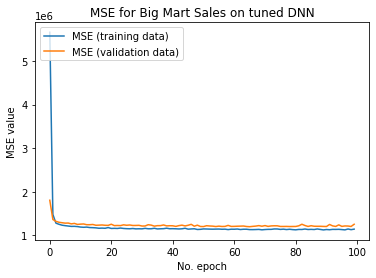

In [65]:
# Plot history: MAE
plt.plot(history.history['loss'], label='MSE (training data)')
plt.plot(history.history['val_loss'], label='MSE (validation data)')
plt.title('MSE for Big Mart Sales on tuned DNN')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# evaluate performance on the test data with best Classifier(Xgboost)

The Machine Learning algorithm that perform the best on Big mart data is DNN with RMSE = 1096

In [66]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility_MeanRatio,Item_Type_Combined,Outlet_Years
8523,20.750,0,0.007565,107.8622,9,1,0,1,1.029192,1,14
8524,8.300,2,0.038428,87.3198,2,2,1,1,1.130311,1,6
8525,14.600,1,0.099575,241.7538,0,2,2,0,1.735215,2,15
8526,7.315,0,0.015388,155.0340,2,2,1,1,1.291577,1,6
8527,13.600,2,0.118599,234.2300,5,1,2,3,0.917824,1,28
...,...,...,...,...,...,...,...,...,...,...,...
14199,10.500,2,0.013496,141.3154,8,2,0,1,0.874729,1,16
14200,7.600,2,0.142991,169.1448,3,1,2,2,0.878292,1,4
14201,10.000,1,0.073529,118.7440,7,2,1,1,1.162245,2,11
14202,15.300,2,0.088380,214.6218,2,2,1,1,1.000000,1,6


In [270]:
data_test = sc_x.fit_transform(test)

In [271]:
y_test_pred = n_model.predict(data_test)

In [272]:
y_test_pred

array([[1690.775 ],
       [1373.4874],
       [ 795.3002],
       ...,
       [1791.0079],
       [3532.4512],
       [1089.5715]], dtype=float32)

In [273]:
sample = pd.DataFrame(final_data)

In [274]:
sample['Item_Outlet_Sales'] = y_test_pred

In [275]:
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1690.775024
1,FDW14,OUT017,1373.487427
2,NCN55,OUT010,795.300171
3,FDQ58,OUT017,2574.104004
4,FDY38,OUT027,5921.264160
...,...,...,...
5676,FDB58,OUT046,2302.567627
5677,FDD47,OUT018,2227.336914
5678,NCO17,OUT045,1791.007935
5679,FDJ26,OUT017,3532.451172


In [276]:
import pickle
filename = 'finalModelANN'

In [277]:
pickle.dump(model,open(filename,'wb'))

In [278]:
sample.to_csv('submit.csv',index = False)